ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (271).

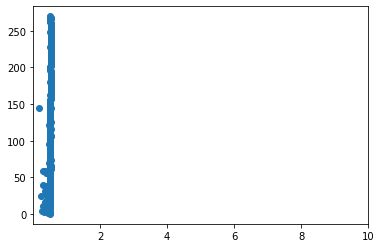

In [27]:
from glob import glob
import os
import pickle
import matplotlib.pyplot as plt

patient_list = glob(os.path.join('custom_lib_t_4', '*'))
patient_list = [x for x in patient_list if '.cfg' not in x]

out = []
patient_list_after = []
for patient_path in patient_list:
    nb_frames = len(glob(os.path.join(patient_path, '*gt.nii.gz')))
    with open(os.path.join(patient_path, 'info_01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ed_idx = np.rint(data['ed_number']).astype(int)
        es_idx = np.rint(data['es_number']).astype(int)
    indices = np.arange(nb_frames)
    rolled = np.roll(indices, -ed_idx)
    payload = np.argwhere(rolled == es_idx)[0][0] / nb_frames
    out.append(payload)
    patient_list_after.append(os.path.basename(patient_path).split('_')[0])

fig, ax = plt.subplots(1, 1)
ax.scatter(out, np.arange(len(out)))
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=1.0)
#ax.set_xticklabels([f'{s:.0%}' for s in np.linspace(0, 1, 10)])
plt.savefig('bug_cardiotrack.png', dpi=600) #dpi=600

163
163


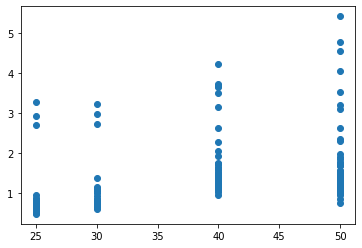

In [5]:
import pandas as pd
from glob import glob
import os
import pickle
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-06-25_13H54_45s_182804\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv")
epe = df['Average']
patient_name = df['patient']

nb_frame_list = []
for patient in patient_name:
    all_files = glob(os.path.join(r'custom_lib_t_4', patient, '*.gz'))
    all_files = [x for x in all_files if '_gt' not in x]
    with open(os.path.join(r'custom_lib_t_4', patient, 'info_01.pkl'), 'rb') as f:
        data = pickle.load(f)
        ## Calculate forward distance
        #forward_distance = (data['ed_number'] - data['es_number']) % len(all_files)
        ## Calculate backward distance
        #backward_distance = (data['es_number'] - data['ed_number']) % len(all_files)
        #nb_frame_list.append(min(forward_distance, backward_distance))
        nb_frame_list.append(len(all_files))

fig, ax = plt.subplots(1, 1)
print(len(epe))
print(len(nb_frame_list))
ax.scatter(nb_frame_list, epe)

In [8]:
import pickle

with open(r'out\nnUNet_preprocessed\Task036_Lib\custom_experiment_planner_stage0\patient270_frame01.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data.keys())
    print(data['size_after_resampling'])
    print(data['size_after_cropping'])
    print(data['original_size_of_raw_data'])
    print(data['original_spacing'])
    print(data['Manufacturer'])
    print(data['MagneticFieldStrength'])
    print(data['spacing_after_resampling'])

odict_keys(['original_size_of_raw_data', 'original_spacing', 'list_of_data_files', 'seg_file', 'itk_origin', 'itk_spacing', 'itk_direction', 'Database', 'FamilyName', 'FileName', 'MagneticFieldStrength', 'Manufacturer', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'SliceThickness', 'SpacingBetweenSlices', 'ed_number', 'es_number', 'folder', 'image', 'label', 'label_img', 'orientations', 'python_Name', 'refPoint_LV', 'refPoint_RV', 'resT', 'resX', 'resY', 'slice_num', 'crop_bbox', 'classes', 'size_after_cropping', 'use_nonzero_mask_for_norm', 'size_after_resampling', 'spacing_after_resampling', 'class_locations'])
(3, 556, 556)
(3, 287, 287)
[  3 288 288]
[7.     1.4375 1.4375]
SIEMENS
1.5
[7.         0.74220002 0.74220002]


In [ ]:
import os
import pickle

total_val = 0
total_test = 0

with open(r'out\nnUNet_preprocessed\Task032_Lib\splits_final.pkl', 'rb') as f:
    data = pickle.load(f)
    val_patient = np.unique([x.split('_')[0] for x in data[0]['val']])

    for patient in val_patient:
        with open(os.path.join(r'out\nnUNet_preprocessed\Task032_Lib\custom_experiment_planner_stage0', patient + '_frame01.pkl'), 'rb') as f:
            data = pickle.load(f)
            gap = np.abs((data['original_spacing'] - data['spacing_after_resampling'])[-1])
            total_val += gap
    total_val = total_val / len(val_patient)


with open(r'out\nnUNet_preprocessed\Task036_Lib\splits_final.pkl', 'rb') as f:
    data = pickle.load(f)
    test_patient = np.unique([x.split('_')[0] for x in data[0]['val']])

    for patient in test_patient:
        with open(os.path.join(r'out\nnUNet_preprocessed\Task036_Lib\custom_experiment_planner_stage0', patient + '_frame01.pkl'), 'rb') as f:
            print(patient)
            data = pickle.load(f)
            gap = np.abs((data['original_spacing'] - data['spacing_after_resampling'])[-1])
            print(gap)
            print('************************')
            total_test += gap
    total_test = total_test / len(test_patient)

print(total_val)
print(total_test)

In [ ]:
import os
import numpy as np

total_val = 0
total_test = 0

with open(r'out\nnUNet_preprocessed\Task032_Lib\splits_final.pkl', 'rb') as f:
    data = pickle.load(f)
    val_patient = np.unique([x.split('_')[0] for x in data[0]['val']])

    for patient in val_patient:
        all_files = glob(os.path.join(r'custom_lib_t_4', patient, '*.gz'))
        all_files = [x for x in all_files if '_gt' not in x]
        total_val += len(all_files)
        

with open(r'out\nnUNet_preprocessed\Task036_Lib\splits_final.pkl', 'rb') as f:
    data = pickle.load(f)
    test_patient = np.unique([x.split('_')[0] for x in data[0]['val']])

    for patient in test_patient:
        all_files = glob(os.path.join(r'custom_lib_t_4', patient, '*.gz'))
        all_files = [x for x in all_files if '_gt' not in x]
        print(patient)
        print(len(all_files))
        total_test += len(all_files)

print(total_val / len(val_patient))
print(total_test / len(test_patient))

In [ ]:
from glob import glob
import os
from tqdm import tqdm
import nibabel as nib

path_list_training = glob(os.path.join('Lib_training_2', '**', '*.gz'))
path_list_training = [x for x in path_list_training if ('4d' not in x and 'gt' in x)]

path_list_testing = glob(os.path.join('Lib_testing_2', '**', '*.gz'))
path_list_testing = [x for x in path_list_testing if ('4d' not in x and 'gt' in x)]

path_list = path_list_training + path_list_testing

total = 0
for path in tqdm(path_list):
    data = nib.load(path)
    arr = data.get_fdata()
    total += arr.shape[-1]

print(total)

In [8]:
from glob import glob
import os
from tqdm import tqdm
import nibabel as nib

path_list = glob(os.path.join(r'custom_quorum_RV_removed', '**', '*.gz'))
path_list = [x for x in path_list if 'gt' in x]

total = 0
for path in tqdm(path_list):
    data = nib.load(path)
    arr = data.get_fdata()
    total += arr.shape[-1]

print(total)

100%|██████████| 390/390 [05:04<00:00,  1.28it/s]

5282


In [47]:
%matplotlib qt
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

depth = -1

path_list = glob(os.path.join(r'Lib_resampling_testing_mask', '*.npy'))
patient_list = np.unique([os.path.basename(x).split('_')[0] for x in path_list])

for patient in patient_list:
    if 'patient270' not in patient:
        continue
    print(patient)
    current_patient_paths = glob(os.path.join(r'Lib_resampling_testing_mask', patient + '*.npy'))
    print(current_patient_paths)

    video = []
    mean_list = []
    for filepath in current_patient_paths:
        data = np.load(filepath)
        arr = data[0]
        mean_list.append(np.abs(arr[:, :, depth]).mean())
        video.append(arr)
    video = np.stack(video, axis=0)
    mean_list = np.stack(mean_list, axis=0)

    print(mean_list.std(0))

    print(video[:, :, :, depth].mean())

    #for i in range(len(video)):
    #    fig, ax = plt.subplots(1, 1)
    #    vmin = video[:, :, :, depth].min()
    #    vmax = video[:, :, :, depth].max()
    #    ax.imshow(video[i, :, :, depth], cmap='gray')
    #    plt.show()
    #    plt.waitforbuttonpress()
    #    plt.close(fig)

patient270
['Lib_resampling_testing_mask\\patient270_frame01.npy', 'Lib_resampling_testing_mask\\patient270_frame02.npy', 'Lib_resampling_testing_mask\\patient270_frame03.npy', 'Lib_resampling_testing_mask\\patient270_frame04.npy', 'Lib_resampling_testing_mask\\patient270_frame05.npy', 'Lib_resampling_testing_mask\\patient270_frame06.npy', 'Lib_resampling_testing_mask\\patient270_frame07.npy', 'Lib_resampling_testing_mask\\patient270_frame08.npy', 'Lib_resampling_testing_mask\\patient270_frame09.npy', 'Lib_resampling_testing_mask\\patient270_frame10.npy', 'Lib_resampling_testing_mask\\patient270_frame11.npy', 'Lib_resampling_testing_mask\\patient270_frame12.npy', 'Lib_resampling_testing_mask\\patient270_frame13.npy', 'Lib_resampling_testing_mask\\patient270_frame14.npy', 'Lib_resampling_testing_mask\\patient270_frame15.npy', 'Lib_resampling_testing_mask\\patient270_frame16.npy', 'Lib_resampling_testing_mask\\patient270_frame17.npy', 'Lib_resampling_testing_mask\\patient270_frame18.npy'

In [44]:
%matplotlib qt
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

depth = -1

path_list = glob(os.path.join(r'custom_lib_t_4', '*'))
patient_list = np.unique([os.path.basename(x).split('_')[0] for x in path_list])

for patient in patient_list:
    if 'patient239' not in patient:
        continue
    print(patient)
    current_patient_paths = glob(os.path.join(r'custom_lib_t_4', patient, patient + '*.nii.gz'))
    current_patient_paths = [x for x in current_patient_paths if '_gt' not in x]
    print(current_patient_paths)

    video = []
    mean_list = []
    for filepath in current_patient_paths:
        data = nib.load(filepath)
        arr = data.get_fdata()
        mean_list.append(arr[:, :, depth].std())
        video.append(arr)
    video = np.stack(video, axis=0)
    mean_list = np.stack(mean_list, axis=0)

    print(video.shape)
    print(mean_list.std(0))

    for i in range(len(video)):
        fig, ax = plt.subplots(1, 1)
        vmin = video[:, :, :, depth].min()
        vmax = video[:, :, :, depth].max()
        ax.imshow(video[i, :, :, depth], cmap='gray')
        plt.show()
        plt.waitforbuttonpress()
        plt.close(fig)

patient239
['custom_lib_t_4\\patient239\\patient239_frame01.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame02.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame03.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame04.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame05.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame06.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame07.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame08.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame09.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame10.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame11.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame12.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame13.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame14.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame15.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame16.nii.gz', 'custom_lib_t_4\\patient239\\patient239_frame17.nii.gz', 'custom_lib_t_4\\pa

In [100]:
from glob import glob
from sklearn.model_selection import train_test_split
import shutil
from distutils.dir_util import copy_tree
from tqdm import tqdm
import numpy as np

training_path = r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Quorum_split\train"
if os.path.exists(training_path):
    shutil.rmtree(training_path)
os.makedirs(training_path)

testing_path = r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Quorum_split\test"
if os.path.exists(testing_path):
    shutil.rmtree(testing_path)
os.makedirs(testing_path)

sub_dir_paths = np.array(next(os.walk('custom_quorum'))[1])
indices = np.arange(len(sub_dir_paths))
nb = 0.2 * len(sub_dir_paths)
test_indices = np.random.choice(indices, int(round(nb)), replace=False)
test_mask = np.zeros_like(indices).astype(bool)
test_mask[test_indices] = 1
path_to_move_test = sub_dir_paths[test_mask]
path_to_move_train = sub_dir_paths[~test_mask]

for test_path in tqdm(path_to_move_test):
    input_path = os.path.join('custom_quorum', test_path)
    output_path = os.path.join(testing_path, test_path)
    shutil.copytree(input_path, output_path, dirs_exist_ok=True)

for train_path in tqdm(path_to_move_train):
    input_path = os.path.join('custom_quorum', train_path)
    output_path = os.path.join(training_path, train_path)
    shutil.copytree(input_path, output_path, dirs_exist_ok=True)


100%|██████████| 156/156 [03:12<00:00,  1.24s/it]


In [4]:
import pickle

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task045_Lib\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    print(len(data[0]['train']))
    print(len(data[0]['val']))

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_raw_data_base\nnUNet_raw_data\Task099_Quorum\splits_final.pkl", 'rb') as f:
    data = pickle.load(f)
    print(len(data))
    print(data[0]['train'])
    print(data[0]['val'])

6507
1650
1
['patient005_ed', 'patient005_es', 'patient008_ed', 'patient008_es', 'patient014_ed', 'patient014_es', 'patient026_ed', 'patient026_es', 'patient028_ed', 'patient028_es', 'patient039_ed', 'patient039_es', 'patient040_ed', 'patient040_es', 'patient043_ed', 'patient043_es', 'patient044_ed', 'patient044_es', 'patient050_ed', 'patient050_es', 'patient060_ed', 'patient060_es', 'patient083_ed', 'patient083_es', 'patient084_ed', 'patient084_es', 'patient087_ed', 'patient087_es', 'patient090_ed', 'patient090_es', 'patient092_ed', 'patient092_es', 'patient096_ed', 'patient096_es', 'patient102_ed', 'patient102_es', 'patient103_ed', 'patient103_es', 'patient108_ed', 'patient108_es', 'patient119_ed', 'patient119_es', 'patient121_ed', 'patient121_es', 'patient123_ed', 'patient123_es', 'patient127_ed', 'patient127_es', 'patient128_ed', 'patient128_es', 'patient131_ed', 'patient131_es', 'patient136_ed', 'patient136_es', 'patient138_ed', 'patient138_es', 'patient141_ed', 'patient141_es', '

In [113]:
import nibabel as nib
import matplotlib.pyplot as plt

data = nib.load(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\Quorum_split\train\patient183\patient183_es.nii.gz")
arr = data.get_fdata()
print(arr.shape)
fig, ax = plt.subplots(1, arr.shape[-1])
for i in range(arr.shape[-1]):
    ax[i].imshow(arr[:, :, i], cmap='gray')
plt.show()

(256, 256, 10)


In [ ]:
from lib.training_utils import read_config
from run.default_configuration import get_default_configuration
import warnings
import os
import sys


warnings.filterwarnings("ignore")

fold = 0
folder_name = 'fold_' + str(fold)
weight_folder = r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_output\Baseline\fold_0'

config = read_config(r'medis_model\config.yaml', False, False)
config['patch_size'] = [224, 224]

plans_file, output_folder_name, dataset_directory, batch_dice, stage, \
        trainer_class = get_default_configuration('2d', 'Task099_Quorum', 'nnMTLTrainerV2', config, 'custom_experiment_planner')

trainer = trainer_class(plans_file, fold, output_folder=weight_folder, dataset_directory=dataset_directory,
                            batch_dice=batch_dice, stage=stage, unpack_data=True,
                            deterministic=True,
                            fp16=True, config=config, inference=True)

trainer.load_final_checkpoint(train=False)

trainer.network.eval()

with open(os.path.join(r'rubbish', 'output.txt'), 'w+') as sys.stdout:
        trainer.validate(save_softmax=False,
                        run_postprocessing_on_folds=True,
                        overwrite=True, 
                        output_folder=os.path.join(r'rubbish', folder_name),
                        patch_size=[288, 288],
                        nb_threads=8,
                        rv_rejection=False,
                        debug=True)

In [ ]:
from lib.training_utils import read_config
from run.default_configuration import get_default_configuration
import warnings
import os
import sys


warnings.filterwarnings("ignore")

fold = 0
folder_name = 'fold_' + str(fold)
weight_folder = r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_model'

config = read_config(r'medis_model\config.yaml', False, False)

plans_file, output_folder_name, dataset_directory, batch_dice, stage, \
        trainer_class = get_default_configuration('2d', 'Task031_ACDC', 'nnMTLTrainerV2', config, 'custom_experiment_planner')

trainer = trainer_class(plans_file, fold, output_folder=weight_folder, dataset_directory=dataset_directory,
                            batch_dice=batch_dice, stage=stage, unpack_data=True,
                            deterministic=True,
                            fp16=True, config=config, inference=True)

trainer.load_final_checkpoint(train=False)

trainer.network.eval()

with open(os.path.join(r'rubbish', 'output.txt'), 'w+') as sys.stdout:
        trainer.validate(save_softmax=False,
                        run_postprocessing_on_folds=True,
                        overwrite=True, 
                        output_folder=os.path.join(r'rubbish', folder_name),
                        patch_size=config['patch_size'],
                        nb_threads=8,
                        rv_rejection=True,
                        debug=True)

In [2]:
%matplotlib qt

import json
import matplotlib.pyplot as plt
import nibabel as nib
import cv2 as cv
import os
import numpy as np

depth = 2

path_1 = r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_rv_rejection\cv_niftis_raw\summary.json"
path_2 = r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_acdc_2\cv_niftis_raw\summary.json"

with open(path_1) as f:
    data1 = json.load(f)['results']['all']

with open(path_2) as f:
    data2 = json.load(f)['results']['all']

out_dict_1 = {}
out_dict_2 = {}
for current_data_1, current_data_2 in zip(data1, data2):
    mean_1 = (current_data_1['1']['Dice'] + current_data_1['2']['Dice'] + current_data_1['3']['Dice']) / 3
    mean_2 = (current_data_2['1']['Dice'] + current_data_2['2']['Dice'] + current_data_2['3']['Dice']) / 3
    out_dict_1[current_data_1['test']] = abs(mean_1 - mean_2)
    out_dict_2[current_data_2['test']] = abs(mean_1 - mean_2)

out_dict_1 = {k: v for k, v in sorted(out_dict_1.items(), key=lambda item: item[1])}
path_1_1 = list(out_dict_1.keys())[-2]
path_1_2 = list(out_dict_1.keys())[-3]
path_1_3 = list(out_dict_1.keys())[-4]

out_dict_2 = {k: v for k, v in sorted(out_dict_2.items(), key=lambda item: item[1])}
path_2_1 = list(out_dict_2.keys())[-2]
path_2_2 = list(out_dict_2.keys())[-3]
path_2_3 = list(out_dict_2.keys())[-4]

fig, ax = plt.subplots(3, 3, figsize=(6,5))

for idx1, (path1, path2) in enumerate(zip([path_1_1, path_1_2, path_1_3], [path_2_1, path_2_2, path_2_3])):
    patient_id = os.path.basename(path1)
    corresponding_gt_path = os.path.join(os.sep.join(path1.split(os.sep)[:-2]), 'gt_niftis', patient_id)
    
    for idx2, path in enumerate([corresponding_gt_path, path1, path2]):

        img_path = os.path.join('ACDC_training', patient_id.split('_')[0], patient_id)
    
        data_img = nib.load(img_path)
        img = data_img.get_fdata()[:, :, depth]

        data = nib.load(path)
        arr = data.get_fdata()[:, :, depth]

        img = cv.normalize(img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
        img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

        for j in range(1, 4):
            pred = (arr == j).astype(np.uint8)
            pred_contours, hierarchy = cv.findContours(pred, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
            color = [0, 0, 0]
            color[j - 1] = 255
            img = cv.drawContours(img, pred_contours, -1, color, 1)
        
        ax[idx1, idx2].imshow(img)
        ax[idx1, idx2].axis('off')

plt.tight_layout()
plt.savefig('Figure_7.tiff', dpi=600) #dpi=600

In [7]:
from evaluation.metrics import dice, hausdorff_distance, avg_surface_distance_symmetric
from tqdm import tqdm
from glob import glob
from scipy import interpolate

path_list = {"in-house/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_acdc_2",
            "ACDC/in-house":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_to_medis_2",
            "in-house/in-house":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_medis",
            "ACDC/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_rv_rejection"
            }

fig, ax = plt.subplots(1, 1)

m_list = []
for key, value in path_list.items():

    base_name = value
    path_list_temp = glob(os.path.join(base_name, 'cv_niftis_raw', '*.gz'))

    if len(path_list_temp) == 0:
        path_list_temp = glob(os.path.join(base_name, 'fold_0', 'temp_allClasses', '*.gz'))


    depth_list = []
    for path in tqdm(path_list_temp):
        data = nib.load(path)
        arr = data.get_fdata()
        depth_list.append(arr.shape[-1])

    m = max(depth_list)
    m_list.append(m)

m = max(m_list)
for key, value in path_list.items():

    base_name = value
    path_list = glob(os.path.join(base_name, 'cv_niftis_raw', '*.gz'))

    if len(path_list) == 0:
        path_list = glob(os.path.join(base_name, 'fold_0', 'temp_allClasses', '*.gz'))

    score_list = []
    for path in tqdm(path_list):
        data = nib.load(path)
        arr = data.get_fdata()

        zoom = list(data.header.get_zooms())
        zoom = zoom[:-1]

        test_set = key.split('/')[-1]
        if test_set == 'ACDC':
            start_index = 2
            path_array_gt = os.path.join(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_raw_data_base\nnUNet_raw_data\Task031_ACDC\labelsTr', os.path.basename(path)))
        else:
            start_index = 0
            path_array_gt = os.path.join(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_raw_data_base\nnUNet_raw_data\Task099_Quorum\labelsTr', os.path.basename(path)))

        #filename = path.split('\\')[-1].split('.')[0] 
        #patient_name = filename.split('_')[0]
        #path_array_gt = os.path.join(os.path.join(base_name, 'gt_niftis', os.path.basename(path)))
        #path_array_gt = os.path.join(r'ACDC_training\patient_name\*_gt.nii.gz')
        #path_array_gt = os.path.join('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\', filename + '.nii.gz')

        gt_data = nib.load(path_array_gt)
        gt_arr = gt_data.get_fdata()

        assert gt_arr.shape == arr.shape

        patient_score_dice = []
        patient_score_assd = []
        patient_score_hd = []
        assd_merged_list = []
        hd_merged_list = []
        for j in range(start_index, arr.shape[-1]):
            class_assd_list = []
            class_hd_list = []
            class_dice_list = []
            for c in range(1, 4):
                current_arr = arr[:, :, j] == c
                current_gt = gt_arr[:, :, j] == c
                class_dice = dice(current_arr, current_gt)
                class_dice_list.append(class_dice)
                #class_assd = avg_surface_distance_symmetric(current_arr, current_gt, voxel_spacing=zoom)
                #class_hd = hausdorff_distance(current_arr, current_gt, voxel_spacing=zoom)
                #class_assd_list.append(class_assd)
                #class_hd_list.append(class_hd)
            class_dice = np.array(class_dice_list)
            #class_assd = np.array(class_assd_list)
            #class_hd = np.array(class_hd_list)
            #patient_score_assd.append(class_assd)
            #patient_score_hd.append(class_hd)
            patient_score_dice.append(class_dice)

        patient_score_dice = np.stack(patient_score_dice, axis=0)
        patient_score_dice = patient_score_dice[~np.isnan(patient_score_dice).all(axis=1)]
        patient_score_dice = np.nanmean(patient_score_dice, axis=1)
        



        x = np.arange(0, len(patient_score_dice))
        f1 = interpolate.interp1d(x, patient_score_dice)
        x_new = np.linspace(0, len(patient_score_dice) - 1, m)
        y_new_1 = np.array(f1(x_new))
        score_list.append(y_new_1)

    patient_score_hd = np.stack(score_list, axis=0).mean(0) * 100
    x = np.arange(len(patient_score_hd)) / len(patient_score_hd)
    ax.set_xticks(np.arange(len(patient_score_hd))[::2])
    ax.set_xticklabels([f'{s:.0%}' for s in x[::2]])
    ax.plot(patient_score_hd, label=key)
    #print(patient_score_assd.shape)
    #data_dict = {'scores_assd': patient_score_assd, 'scores_hd': patient_score_hd, 'depth': np.arange(arr.shape[-1]), 'path': np.full(shape=(arr.shape[-1],), fill_value=path)}

ax.set_ylabel('Dice')
ax.set_xlabel('Depth')
ax.legend()
plt.savefig('Figure_9_a.tiff', dpi=600) #dpi=600

100%|██████████| 200/200 [00:04<00:00, 44.30it/s]


In [8]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import matplotlib.ticker as mtick

path_list = {"in-house/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_acdc_2\cv_niftis_raw\summary.json",
            "ACDC/in-house":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_to_medis_2\fold_0\temp_allClasses\summary.json",
            "in-house/in-house":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_medis\fold_0\temp_allClasses\summary.json",
            "ACDC/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_rv_rejection\cv_niftis_raw\summary.json"}
fig, ax = plt.subplots(1, 1)

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['results']['all']

    mean_dice_list = []
    for data in patient_data_list_1:
        mean_dice = ((data['1']['Dice'] + data['2']['Dice'] + data['3']['Dice']) / 3) * 100
        mean_dice_list.append(mean_dice)
    
    mean_dice = np.array(mean_dice_list)

    y = []
    x = []
    for thresh in np.linspace(85, 100, 1000):
        value = np.count_nonzero(mean_dice < thresh) / len(mean_dice)
        y.append(value * 100)
        x.append(thresh)

    #ax.set_yticks(np.arange(len(y))[::6])
    #ax.set_yticklabels([f'{s:.0%}' for s in y])
    ax.plot(x, y, label=key)

    #if key == 'Ours':
    #    ax.axvline(x=np.median(mean_dice), ls=':', c='k')
        

ax.set_ylabel('Percent of data')
ax.set_xlabel('Dice score')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
plt.savefig('Figure_9_b.tiff', dpi=600) #dpi=600

In [4]:
import pickle
import os
import nibabel as nib
from tqdm import tqdm

pickle_path_train = r"out\nnUNet_preprocessed\Task032_Lib\splits_final.pkl"
pickle_path_test = r"out\nnUNet_preprocessed\Task036_Lib\splits_final.pkl"

with open(pickle_path_train, 'rb') as f:
    data = pickle.load(f)
    train = data[0]['train']
    val = data[0]['val']

with open(pickle_path_test, 'rb') as f:
    data = pickle.load(f)
    test = data[0]['val']

out_dict = {'train': 0, 'val': 0, 'test': 0}

for my_set, my_set_path, my_str in zip([train, val, test], 
                               [pickle_path_train, pickle_path_train, pickle_path_test],
                               ['train', 'val', 'test']):
    for patient in tqdm(my_set):
        patient_filename = patient + '_0000.nii.gz'
        patient_path = os.path.join(r'out\nnUNet_raw_data_base\nnUNet_raw_data', my_set_path.split('\\')[2], 'imagesTr', patient_filename)

        data = nib.load(patient_path)
        arr = data.get_fdata()
        out_dict[my_str] += arr.shape[-1]
print(out_dict)

100%|██████████| 1945/1945 [00:19<00:00, 100.70it/s]

{'train': 22743, 'val': 5334, 'test': 6375}


In [5]:
import pickle
import os
import nibabel as nib
from tqdm import tqdm

pickle_path_train = r"out\nnUNet_preprocessed\Task027_ACDC\splits_final.pkl"

out_dict = {'train': 0, 'test': 0}
for i in range(5):

    with open(pickle_path_train, 'rb') as f:
        data = pickle.load(f)
        train = data[i]['train']
        test = data[i]['val']

    for my_set, my_set_path, my_str in zip([train, test], 
                                [pickle_path_train, pickle_path_train],
                                ['train', 'test']):
        for patient in tqdm(my_set):
            patient_filename = patient + '_0000.nii.gz'
            patient_path = os.path.join(r'out\nnUNet_raw_data_base\nnUNet_raw_data', my_set_path.split('\\')[2], 'imagesTr', patient_filename)

            data = nib.load(patient_path)
            arr = data.get_fdata()
            out_dict[my_str] += arr.shape[-1] / 5

print(out_dict)

100%|██████████| 40/40 [00:00<00:00, 120.64it/s]

{'train': 1521.5999999999972, 'test': 380.4000000000002}


In [66]:
%matplotlib qt

from glob import glob
import os
import scipy
import csv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

#strain folder here:
folder1 = r'C:\Users\Portal\Documents\voxelmorph\exposant\Supervised\Task032_Lib\fold_0\Lib\test\Postprocessed\Strain'

path_list1 = glob(os.path.join(folder1, 'GT', '*.mat'))
out_list = []
corresponding_gt_basename1 = os.path.basename(path_list1[0])[:-6] + 'gt.mat'

corresponding_gt_path1 = os.path.join(folder1, 'GT', corresponding_gt_basename1)

#mat_ai1 = scipy.io.loadmat(path1, simplify_cells=True)

mat_gt1 = scipy.io.loadmat(corresponding_gt_path1, simplify_cells=True)

Sradial_LV_curve_ai = mat_gt1['Structure_gt']['Sradial_LV_curve']
Scirc_LV_curve_ai = mat_gt1['Structure_gt']['Scirc_LV_curve']

label_list = ['Antérieur', 'Antéro-septal', 'Inféro-septal', 'Inférieur', 'Inféro-lateral', 'Antéro-lateral']

fig, ax = plt.subplots(1, 2, figsize=(14,6))
for i in range(1, len(Sradial_LV_curve_ai)):
    label = 'global' if i == 0 else i
    ax[0].plot(np.arange(Scirc_LV_curve_ai.shape[1]), Scirc_LV_curve_ai[i], label=label_list[i-1])
    ax[1].plot(np.arange(Sradial_LV_curve_ai.shape[1]), Sradial_LV_curve_ai[i], label=label_list[i-1])
ax[0].set_xlabel("Phase du cycle cardiaque", size=15)
ax[0].set_ylabel("Pourcentage de déformation", size=15)
ax[0].legend(prop={'size': 15})
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)

ax[1].set_xlabel("Phase du cycle cardiaque", size=15)
ax[1].set_ylabel("Pourcentage de déformation", size=15)
ax[1].legend(prop={'size': 15})
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)

#plt.show()
#plt.waitforbuttonpress()
#plt.close(fig)

plt.savefig('regional_strain_curve.png', dpi=600)

Compute ES epe

In [13]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import pandas as pd

#path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            "DeepTag":r"C:\Users\Portal\Documents\cardiac_tagging_motion_estimation\cardiac_tagging_motion_estimation\model\2023-12-18_19H51\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\biomechanical_loss_folder\bioinformed_reg\models\2023-12-04_11H26\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            #"V1": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_18H56\Task032_Lib\fold_0\Lib\test\Postprocessed\Flow\contour_metrics.json",
#            "Ours": r"C:\Users\Portal\Documents\voxelmorph\2023-12-14_17H47\Task032_Lib\fold_0\Lib\test\Postprocessed\Flow\contour_metrics.json"}

#path_list = {"V1": r"C:\Users\Portal\Documents\voxelmorph\multi_task\2024-04-17_08H35_38s_534023\Task045_Lib\fold_0\Lib\val\Postprocessed\Backward_flow\contour_metrics.json",
#             "V2": r"C:\Users\Portal\Documents\voxelmorph\multi_task\2024-04-15_02H11_10s_514482\Task045_Lib\fold_0\Lib\val\Postprocessed\Backward_flow\contour_metrics.json",
#             "V3": r"C:\Users\Portal\Documents\voxelmorph\new_models_256\2024-03-01_23H51_16s_864320\Task045_Lib\fold_0\Lib\val\Postprocessed\Flow\contour_metrics.json"}

path_list = {"ICPR": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-05-22_10H49_22s_321621\Task045_Lib\fold_0\Lib\val\Postprocessed\Flow\contour_metrics.json",
             "ICPR_label": r"C:\Users\Portal\Documents\voxelmorph\deformable\2024-06-08_17H04_04s_798876\Task045_Lib\fold_0\Lib\val\Postprocessed\Flow\contour_metrics.json"}

df_list = []
for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['all']

    all_data_1 = []
    for k in patient_data_list_1.keys():
        all_data_1.extend(patient_data_list_1[k])

    patient_name_list = []
    for current_data in all_data_1:
        patient_name = current_data['Name']
        if patient_name not in patient_name_list:
            patient_name_list.append(patient_name)

    mean_epe_list = []
    for patient_name in patient_name_list:

        pkl_path = sorted(glob(os.path.join('custom_lib_t_4', patient_name, '*.pkl')))[-1]
        sequence_length = int(os.path.basename(pkl_path).split('.')[0][-2:])

        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            ed_idx = np.round(data['ed_number']).astype(int)
            es_idx = np.round(data['es_number']).astype(int)

        data_list_1 = []
        for current_data_1 in all_data_1:
            if current_data_1['Name'] == patient_name:
                indices = np.arange(len(current_data_1['ENDO']) + 1)
                indices = np.concatenate([indices[ed_idx:], indices[:ed_idx]])
                sorted_es_idx = np.argwhere(indices == es_idx)[0][0] - 1
                #mean_epe = np.array([current_data_1['ENDO'][sorted_es_idx]]).mean()
                mean_epe = np.array([current_data_1['ENDO'][sorted_es_idx], current_data_1['EPI'][sorted_es_idx], current_data_1['RV'][sorted_es_idx]]).mean()
                mean_epe_list.append(mean_epe)
    
    mean_epe = np.array(mean_epe_list)

    df = pd.DataFrame({"EPE_" + key : mean_epe})
    df_list.append(df)

    print(len(mean_epe))
    print(key)
    print(mean_epe.mean())
    print(mean_epe.std())
    print('***************************')

df = pd.concat(df_list, axis=1)
df.to_csv("es_mean.csv", index=False)

142
ICPR
1.8473078906536102
0.7077107120576156
***************************
140
ICPR_label
1.8316171088388988
0.7224873573261256
***************************


Compute ES Dice

In [1]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import pandas as pd


path_list = {"SyN":r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\Syn\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-SSD":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-02_10H57\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Raft":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\2023-12-14_17H47\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json"}

#path_list = {"V1": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_18H56\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
#            "V2": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
#            "V3": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H06\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
#            "V4": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H09\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
#            "V5": r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H19\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json",
#            "Ours": r"C:\Users\Portal\Documents\voxelmorph\2023-12-14_17H47\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered\segmentation_metrics.json"}


df_list = []
for key in path_list.keys():

    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['all']

    all_data_1 = []
    for k in patient_data_list_1.keys():
        all_data_1.extend(patient_data_list_1[k])

    patient_name_list = []
    for current_data in all_data_1:
        patient_name = os.path.basename(current_data['reference']).split('_')[0]
        if patient_name not in patient_name_list:
            patient_name_list.append(patient_name)

    mean_dice_list = []
    mean_assd_list = []
    mean_hd_list = []
    for patient_name in patient_name_list:

        pkl_path = sorted(glob(os.path.join('custom_lib_t_4', patient_name, '*.pkl')))[-1]
        sequence_length = int(os.path.basename(pkl_path).split('.')[0][-2:])

        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            es_idx = np.round(data['es_number']).astype(int)

        data_list_1 = []
        for current_data_1 in all_data_1:
            splitted = os.path.basename(current_data_1['test']).split('_')
            if splitted[0] == patient_name:
                if int(splitted[1].split('.')[0][-2:]) == es_idx + 1:
                    mean_dice = np.array([current_data_1['LV']['Dice'], current_data_1['RV']['Dice'], current_data_1['MYO']['Dice']]).mean()
                    mean_assd = np.array([current_data_1['LV']['ASSD'], current_data_1['RV']['ASSD'], current_data_1['MYO']['ASSD']]).mean()
                    mean_hd = np.array([current_data_1['LV']['HD'], current_data_1['RV']['HD'], current_data_1['MYO']['HD']]).mean()
                    mean_dice_list.append(mean_dice)
                    mean_assd_list.append(mean_assd)
                    mean_hd_list.append(mean_hd)
    
    assert len(mean_dice_list) == len(patient_name_list)
    
    mean_dice = np.array(mean_dice_list)
    mean_assd = np.array(mean_assd_list)
    mean_hd = np.array(mean_hd_list)

    df = pd.DataFrame({"Dice_" + key : mean_dice, "ASSD_" + key : mean_assd, 'HD_' + key: mean_hd})
    df_list.append(df)

    print(key)
    print(mean_dice.mean())
    print(mean_assd.mean())
    print(mean_hd.mean())
    print(mean_dice.std())
    print(mean_assd.std())
    print(mean_hd.std())
    print('***************************')

df = pd.concat(df_list, axis=1)
df.to_csv("es_mean.csv", index=False)

SyN
0.8759615861999799
0.41010159662737894
6.908497880361312
0.05743293851290108
0.3097627813634697
2.505118624237446
***************************
IterWarpImg
0.8811536378981815
0.3286134706275917
6.451985221558861
0.033009083544325614
0.16255159810739864
1.4333734524854742
***************************
IterWarpFlow
0.885804666397156
0.30464479445909715
6.357684268630175
0.03096533367555088
0.14855779915718395
1.4193069093198754
***************************
VM-SSD
0.9347815694697265
0.12670707097194017
3.9847190591389223
0.014555123921249571
0.050583944843621116
1.0862595628057592
***************************
VM-NCC
0.9120207178748058
0.22465407344025334
5.761384471634919
0.029466317761012654
0.1383817708771458
2.025304560117071
***************************
VM-DIF
0.9345217447427348
0.12545973869410942
3.837814633824968
0.014811900992223495
0.05031945866802464
1.0468394227270803
***************************
bioinformed
0.9458007641248887
0.0957415919923602
3.346483510400578
0.0104076750443471

In [ ]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD\Lib\test\Postprocessed\Flow\contour_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF\Lib\test\Postprocessed\Flow\contour_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC\Lib\test\Postprocessed\Flow\contour_metrics.json",
            #"SyN":r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\Syn\Lib\test\Postprocessed\Flow\contour_metrics.json",
            #"IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\IterWarpImg\Lib\test\Postprocessed\Flow\contour_metrics.json",
            #"IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\2023-12-15_19H01\IterWarpFlow\Lib\test\Postprocessed\Flow\contour_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\2023-12-14_17H47\Task032_Lib\fold_0\Lib\test\Postprocessed\Flow\contour_metrics.json"}

path_list = {"ICPR": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-05-22_10H49_22s_321621\Task045_Lib\fold_0\Lib\val\Postprocessed\Flow\contour_metrics.json",
             "ICPR_label": r"C:\Users\Portal\Documents\voxelmorph\deformable\2024-06-08_17H04_04s_798876\Task045_Lib\fold_0\Lib\val\Postprocessed\Flow\contour_metrics.json"}

fig, ax = plt.subplots(1, 1)

min_list = []

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list = data['all']

    all_data_1 = []
    for k in patient_data_list.keys():
        all_data_1.extend(patient_data_list[k])

    m = max([len(x['ENDO']) for x in all_data_1])

    y_new_1_list = []
    for patient_data_1 in all_data_1:
        x = np.arange(0, len(patient_data_1['ENDO']))

        y1_endo = patient_data_1['ENDO']

        y1_epi = patient_data_1['EPI']

        y1_rv = patient_data_1['RV']

        y1 = y1_endo
        #y1 = np.stack([y1_endo, y1_epi, y1_rv], axis=0).mean(0)

        print(np.argmax(y1) / len(y1))

        f1 = interpolate.interp1d(x, y1)

        x_new = np.linspace(0, len(patient_data_1['ENDO']) - 1, m)
        y_new_1 = np.array(f1(x_new))

        y_new_1_list.append(y_new_1)

    y1_arr = np.stack(y_new_1_list, axis=0)
    y1 = y1_arr.mean(0)
    y1_error = y1_arr.std(0)

    min_list.append(y1.min())
    min_list.append(y1.max())

    #y1 = np.roll(y1, shift=len(y1)//2)
    #y1_error = np.roll(y1_error, shift=len(y1_error)//2)
#
    #x1 = np.arange(1, len(y1)//2 + 1) 
    #x2 = np.arange(len(y1)//2 + 1, 0, step=-1)
    #x1 = x1 / (2 * len(x1))
    #x2 = x2 / (2 * len(x2))
    #x = np.concatenate([x2, x1])

    x = np.arange(len(y1)) / len(y1)

    x_axis = np.arange(len(y1))

    ax.set_xticks(np.arange(len(y1))[::6])
    ax.set_xticklabels([f'{s:.0%}' for s in x[::6]])
    ax.plot(y1, label=key)
    #ax.errorbar(x_axis, y1, y1_error, linestyle='None', marker='^', label='T=2')
    #ax.fill_between(x_axis, y1=y1 - y1_error, y2=y1 + y1_error, alpha=0.1)

ax.set_ylabel('EPE')
ax.set_xlabel('Distance from the ED frame as percent of the cardiac cycle')
ax.fill_between(np.linspace(19, 29, 20), np.full(shape=(20,), fill_value=min(min_list)), np.full(shape=(20,), fill_value=max(min_list)), alpha=0.2, facecolor='red')
ax.axvline(x=0, ls=':', c='k')
plt.text((len(x) - 7) / 2, 0.8, 'ES area', fontsize = 10)  
plt.text(-1, 2.0, 'ED', fontsize = 10) 
ax.legend()
plt.savefig('EPE_in_time.png', dpi=600) #dpi=600

In [14]:
from glob import glob
import os
import torch
from pathlib import Path
from nnunet.lib.utils import ConvBlocks2DGroup
from nnunet.lib.training_utils import build_2d_model
from nnunet.lib.training_utils import read_config
import numpy as np
import monai.transforms as T
from monai.transforms import Compose
from nnunet.training.network_training.processor import Processor

def set_up_preprocessing_pipeline():
    preprocess = Compose([
                        T.SpatialPadd(keys=['image', 'mask'], spatial_size=384, allow_missing_keys=True),
                        T.CenterSpatialCropd(keys=['image', 'mask'], roi_size=384, allow_missing_keys=True),
                        T.ToTensor(dtype=torch.float32, device='cuda:0')
                        ])

    return preprocess

def preprocess(image, mask, preprocessing_transform):
    if mask is not None:
        data = {'image': image, 'mask': mask}
        transformed = preprocessing_transform(data)
        image = transformed['image']
        mask = transformed['mask']
    else:
        data = {'image': image}
        transformed = preprocessing_transform(data)
        image = transformed['image']

    return image, mask

preprocessing_transform = set_up_preprocessing_pipeline()


path_list = glob(os.path.join(r'C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task045_Lib\custom_experiment_planner_stage0', '*.npy'))

cropper_config = read_config(os.path.join(Path.cwd(), 'adversarial_acdc.yaml'), False, False)
cropping_conv_layer = ConvBlocks2DGroup
cropping_network = build_2d_model(cropper_config, conv_layer=cropping_conv_layer, norm=getattr(torch.nn, cropper_config['norm']), log_function=print, image_size=384, window_size=8, middle=False, num_classes=2, processor=None)
cropping_network.load_state_dict(torch.load(os.path.join('binary_lib', 'model_final_checkpoint.model'))['state_dict'], strict=True)
cropping_network.eval()
cropping_network.do_ds = False
processor = Processor(crop_size=192, image_size=384, cropping_network=cropping_network)

pretrained_config = read_config(os.path.join(Path.cwd(), '2d_cardiotrack_crop_normalized_2', 'config.yaml'), False, False)
pretrained_conv_layer = ConvBlocks2DGroup
pretrained_network = build_2d_model(pretrained_config, conv_layer=pretrained_conv_layer, norm=getattr(torch.nn, pretrained_config['norm']), log_function=print, image_size=192, window_size=8, middle=False, num_classes=4, processor=None)
pretrained_network.load_state_dict(torch.load(os.path.join('2d_cardiotrack_crop_normalized_2', 'model_final_checkpoint.model'))['state_dict'], strict=True)
pretrained_network.eval()
pretrained_network.do_ds = False

patient_list = np.unique([os.path.basename(x).split('_')[0] for x in path_list])

for patient in patient_list:
    patient_path_list = [x for x in path_list if patient in x]
    patient_block = []
    for patient_path in patient_path_list:
        arr = np.load(patient_path)
        assert len(arr) == 2
        img = arr[0]
        mask = arr[1]
        mask[mask < 0] = 0
        img, mask = preprocess(img, mask, preprocessing_transform)
        patient_block.append(img)
    patient_block = torch.stack(patient_block, dim=0)
    for d in range(patient_block.shape[1]):
        with torch.no_grad():
            mean_centroid, _ = processor.preprocess_no_registration(data=torch.clone(patient_block[:, d][:, None])) # T, C(1), H, W
            cropped_unlabeled, padding_need = processor.crop_and_pad(data=patient_block[:, d][:, None], mean_centroid=mean_centroid)
            padding_need_list.append(padding_need)
    print(patient_block.shape)

#for path in path_list:
#    arr = np.load(path)
#    assert len(arr) == 2
#    for d in range(arr.shape[1]):
#        img = arr[0, d]
#        mask = arr[1, d]
#        mask[mask < 0] = 0
#        image, mask = preprocess(image, mask, preprocessing_transform)

torch.Size([40, 7, 384, 384])
torch.Size([40, 3, 384, 384])
torch.Size([40, 3, 384, 384])
torch.Size([40, 6, 384, 384])
torch.Size([40, 3, 384, 384])
torch.Size([40, 3, 384, 384])
torch.Size([40, 6, 384, 384])
torch.Size([40, 5, 384, 384])
torch.Size([40, 6, 384, 384])


KeyboardInterrupt: 

patient018_frame13.nii.gz
(207, 224, 5)
(4, 20, 40)
patient018_frame33.nii.gz
(207, 224, 5)


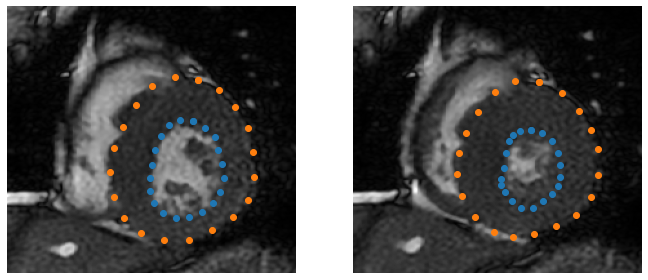

In [26]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pickle
import os

patient_nb = 'patient018'
depth = 1

with open(os.path.join(r'custom_lib_t_4', patient_nb, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    es_idx = np.rint(data['es_number']).astype(int)
    ed_idx = np.rint(data['ed_number']).astype(int)

filename = f'{patient_nb}_frame' + str(es_idx + 1).zfill(2) + '.nii.gz'
print(filename)

data = nib.load(os.path.join(r'custom_lib_t_4', patient_nb, filename))
arr = data.get_fdata()
print(arr.shape)

points = np.load(os.path.join('custom_lib_t_4', patient_nb, 'contour', 'LV', f'{patient_nb}_slice' + str(depth+1).zfill(2) + '.npy'))
#points = np.load(r'custom_lib_t_4\patient001\contour\LV\patient001_slice03.npy')
print(points.shape)

x_endo = np.concatenate([points[0, :, es_idx], points[0, 0, es_idx].reshape(-1,)], axis=0)
y_endo = np.concatenate([points[1, :, es_idx], points[1, 0, es_idx].reshape(-1,)], axis=0)
x_epi = np.concatenate([points[2, :, es_idx], points[2, 0, es_idx].reshape(-1,)], axis=0)
y_epi = np.concatenate([points[3, :, es_idx], points[3, 0, es_idx].reshape(-1,)], axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[1].imshow(arr[:, :, depth], cmap='gray')
ax[1].scatter(x_endo, y_endo)
ax[1].scatter(x_epi, y_epi)
ax[1].axis('off')

filename = f'{patient_nb}_frame' + str(ed_idx + 1).zfill(2) + '.nii.gz'
print(filename)

data = nib.load(os.path.join(r'custom_lib_t_4', patient_nb, filename))
arr2 = data.get_fdata()
print(arr.shape)

x_endo = np.concatenate([points[0, :, ed_idx], points[0, 0, ed_idx].reshape(-1,)], axis=0)
y_endo = np.concatenate([points[1, :, ed_idx], points[1, 0, ed_idx].reshape(-1,)], axis=0)
x_epi = np.concatenate([points[2, :, ed_idx], points[2, 0, ed_idx].reshape(-1,)], axis=0)
y_epi = np.concatenate([points[3, :, ed_idx], points[3, 0, ed_idx].reshape(-1,)], axis=0)

ax[0].imshow(arr2[:, :, depth], cmap='gray')
ax[0].scatter(x_endo, y_endo)
ax[0].scatter(x_epi, y_epi)
ax[0].axis('off')

plt.tight_layout()
plt.savefig('strain.png', dpi=600)

In [1]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

depth = 1

path_list = glob(os.path.join(r'Lib_no_resampling_training_mask', '*.npy'))
for path in path_list:
    data = np.load(path)
    
    fig, ax = plt.subplots(1, 5, sharey=True)
    im1 = ax[0].imshow(data[0, :, :, depth], cmap='gray')
    im2 = ax[1].imshow(data[1, :, :, depth], cmap='gray')
    im3 = ax[2].imshow(data[2, :, :, depth], cmap='hot')
    im4 = ax[3].imshow(data[3, :, :, depth], cmap='hot')
    im5 = ax[4].imshow(data[4, :, :, depth], cmap='hot')
    for i in range(5):
        ax[i].axis('off')

    cbar_ax = fig.add_axes([0.45, 0.35, 0.5, 0.05])
    fig.colorbar(im3, cax=cbar_ax, orientation='horizontal')
    
    #fig.colorbar(im3, ax=ax[:], location='bottom')

    #divider5 = make_axes_locatable(ax[2])
    #cax5 = divider5.append_axes("bottom", size="5%", pad=0.05)
    #plt.colorbar(im3, ax=ax[2:], cax=cax5, orientation='horizontal') 

    plt.waitforbuttonpress()
    plt.show()
    plt.close(fig)

KeyboardInterrupt: 

In [2]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

depth = 1

data = np.load(r'Lib_no_resampling_training_mask\patient258_frame03.npy')
    
fig, ax = plt.subplots(1, 5, sharey=True)
im1 = ax[0].imshow(data[0, :, :, depth], cmap='gray')
im2 = ax[1].imshow(data[1, :, :, depth], cmap='gray')
im3 = ax[2].imshow(data[2, :, :, depth], cmap='hot')
im4 = ax[3].imshow(data[3, :, :, depth], cmap='hot')
im5 = ax[4].imshow(data[4, :, :, depth], cmap='hot')
for i in range(5):
    ax[i].axis('off')

cbar_ax = fig.add_axes([0.42, 0.33, 0.55, 0.03])
fig.colorbar(im3, cax=cbar_ax, orientation='horizontal')

plt.tight_layout()
#fig.colorbar(im3, ax=ax[:], location='bottom')

#divider5 = make_axes_locatable(ax[2])
#cax5 = divider5.append_axes("bottom", size="5%", pad=0.05)
#plt.colorbar(im3, ax=ax[2:], cax=cax5, orientation='horizontal') 

#plt.waitforbuttonpress()
#plt.show()
#plt.close(fig)

plt.savefig('distance_map.png', dpi=600)

C:\Users\Portal\AppData\Local\Temp/ipykernel_30172/4030255192.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [4]:
data = np.load(r'Lib_no_resampling_training_mask\patient0234.npy')[0]
print(data.shape)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(data[:, :, 0], cmap='gray')
ax[1].imshow(data[:, :, 1], cmap='gray')
ax[2].imshow(data[:, :, 2], cmap='gray')

(192, 192, 3)


In [4]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

depth = -1

path_list = glob(os.path.join(r'Lib_resampling_training_mask', 'patient234*.npy'))
for path in path_list:
    data = np.load(path)
    data[2:] = data[2:]**1

    fig, ax = plt.subplots(2, 3)
    ax[0, 0].imshow(data[2, :, :, -1]**100, cmap='hot')
    ax[0, 1].imshow(data[3, :, :, -1]**100, cmap='hot')
    ax[0, 2].imshow(data[4, :, :, -1]**100, cmap='hot')
    ax[1, 0].imshow(data[0, :, :, -1], cmap='gray')
    ax[1, 1].imshow(data[1, :, :, -1] + data[3, :, :, -1] ** 10, cmap='gray')
    while not plt.waitforbuttonpress(): pass
    plt.show()
    plt.close(fig)
    

KeyboardInterrupt: 

In [59]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

depth = -1

path_list = glob(os.path.join(r'Lib_resampling_training_mask', 'patient001*.npy'))
for path in path_list[:1]:
    data = np.load(path)
    print(data.shape)


    fig, ax = plt.subplots(3, 4, figsize=(3, 3))
    ax[0, 0].imshow(data[0, :, :, 1], cmap='gray')
    ax[0, 1].imshow(data[1, :, :, 1], cmap='gray')
    ax[0, 2].remove()
    ax[0, 3].remove()


    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 0.0625))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.03125)
    ax[1, 1].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 1].text(0.5,-0.15, "k=0.03125", size=6, ha="center", transform=ax[1, 1].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 0.126))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.0625)
    ax[1, 2].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 2].text(0.5,-0.15, "k=0.0625", size=6, ha="center", transform=ax[1, 2].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 0.25))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.125)
    ax[1, 3].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 3].text(0.5,-0.15, "k=0.125", size=6, ha="center", transform=ax[1, 3].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 0.5))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.25)
    ax[2, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[2, 0].text(0.5,-0.15, "k=0.25", size=6, ha="center", transform=ax[2, 0].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 1.0))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.5)
    im = ax[2, 1].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[2, 1].text(0.5,-0.15, "k=0.5", size=6, ha="center", transform=ax[2, 1].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 2.0))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 1.0)
    ax[2, 2].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[2, 2].text(0.5,-0.15, "k=1.0", size=6, ha="center", transform=ax[2, 2].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 4.0))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 0.015625)
    ax[1, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 0].text(0.5,-0.15, "k=0.015625", size=6, ha="center", transform=ax[1, 0].transAxes)
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 1.0))
    dm = np.power(4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2), 1.0)
    ax[2, 3].imshow(dm.astype(int), cmap='gray', vmin=0.0, vmax=1.0)
    ax[2, 3].text(0.5,-0.15, r"$k \to \infty$ ", size=6, ha="center", transform=ax[2, 3].transAxes)

    for i in range(len(ax)):
        for j in range(len(ax[i])):
            ax[i, j].axis('off')

    cbar_ax = fig.add_axes([0.025, 0.07, 0.95, 0.05])
    cbar_ax.tick_params(labelsize=6)
    cbar_ax.xaxis.set_tick_params(pad=0.5)
    fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

    plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.2)
    for j in range(2):
        box = ax[0, j].get_position()
        box.x0 = box.x0 + 0.251
        box.x1 = box.x1 + 0.251
        ax[0, j].set_position(box)

    #while not plt.waitforbuttonpress(): pass
    #plt.show()
    #plt.close(fig)
    #plt.tight_layout()


plt.savefig('distance_map.png', dpi=600)
    

(6, 192, 192, 7)


In [14]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

depth=2

path_list = sorted(glob(os.path.join(r'Lib_resampling_testing_mask', 'patient197*.npy')))

for path in path_list:
    data = np.load(path)[2:]
    print(data.shape)

    data = np.power(4 * np.exp(-data) / ((1 + np.exp(-data))**2), 1.0)
    data = data.astype(int)

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(data[3, :, :, depth], cmap='gray')
    merged = data[0, :, :, depth] + data[1, :, :, depth] + data[2, :, :, depth]
    merged[merged > 1] = 1
    ax[1].imshow(merged, cmap='gray')
    plt.waitforbuttonpress()
    plt.show()
    plt.close(fig)
    

(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)
(4, 192, 192, 3)


In [1]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

depth = -1

path_list = glob(os.path.join(r'Lib_resampling_training_mask', 'patient001*.npy'))
for path in path_list[:1]:
    data = np.load(path)
    print(data.shape)


    fig, ax = plt.subplots(5, 2, figsize=(5, 8))
    ax[0, 0].imshow(data[0, :, :, 1], cmap='gray')
    ax[0, 1].imshow(data[1, :, :, 1], cmap='gray')
    #dm = 1 / (1 + np.power(data[-1, :, :, 1], 0.0625))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-2*data[-1, :, :, 1]))**2)
    ax[1, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 0].text(0.5,-0.15, "k=0.03125", size=10, ha="center", transform=ax[1, 0].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 0.125))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[1, 1].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[1, 1].text(0.5,-0.15, "k=0.0625", size=10, ha="center", transform=ax[1, 1].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 0.25))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[2, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[2, 0].text(0.5,-0.15, "k=0.125", size=10, ha="center", transform=ax[2, 0].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 0.5))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[2, 1].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[2, 1].text(0.5,-0.15, "k=0.25", size=10, ha="center", transform=ax[2, 1].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 1.0))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    im = ax[3, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[3, 0].text(0.5,-0.15, "k=0.5", size=10, ha="center", transform=ax[3, 0].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 2.0))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[3, 1].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[3, 1].text(0.5,-0.15, "k=1.0", size=10, ha="center", transform=ax[3, 1].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 4.0))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[4, 0].imshow(dm, cmap='hot', vmin=0.0, vmax=1.0)
    ax[4, 0].text(0.5,-0.15, "k=2.0", size=10, ha="center", transform=ax[4, 0].transAxes)
    #dm = 1 / (1 + data[-1, :, :, 1], 1.0))
    dm = 4 * np.exp(-data[-1, :, :, 1]) / ((1 + np.exp(-data[-1, :, :, 1]))**2)
    ax[4, 1].imshow(dm.astype(int), cmap='gray', vmin=0.0, vmax=1.0)
    ax[4, 1].text(0.5,-0.15, r"$k \to \infty$ ", size=10, ha="center", transform=ax[4, 1].transAxes)

    for i in range(len(ax)):
        for j in range(len(ax[i])):
            ax[i, j].axis('off')

    cbar_ax = fig.add_axes([0.88, 0.04, 0.05, 0.75])
    fig.colorbar(im, cax=cbar_ax, orientation='vertical')

    #while not plt.waitforbuttonpress(): pass
    #plt.show()
    #plt.close(fig)
    plt.tight_layout()


plt.savefig('distance_map.png', dpi=600)
    

(6, 192, 192, 7)


C:\Users\Portal\AppData\Local\Temp/ipykernel_40652/3849029685.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [4]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

path_list = glob(os.path.join(r'Lib_resampling_training_mask', '*.npy'))
total_sum = 0
total_max = 0
for path in tqdm(path_list):
    arr = np.load(path)[-1]
    #print(arr.shape)
    #for d in range(arr.shape[0]):
    #    if arr[d, :, :].sum() < 0:
    #        fig, ax = plt.subplots(1, 1)
    #        ax.imshow(arr[d, :, :], cmap='hot')
    #        while not plt.waitforbuttonpress(): pass
    total_sum += arr.sum()
    total_max += arr.size

print(total_max / total_sum)

100%|██████████| 8157/8157 [00:41<00:00, 194.70it/s]

1.1223998657067695


In [10]:
from glob import glob
import os


total = 0

patient_path = glob(os.path.join(r'custom_lib_t_4', '*'))
patient_path_list = [x for x in patient_path if '.cfg' not in x]
for patient_path in patient_path_list:
    path_list = glob(os.path.join(patient_path, '*.gz'))
    path_list = [x for x in path_list if '_gt' not in x]
    total += len(path_list)
total = total / len(patient_path_list)
print(total/2)

18.638376383763838


In [11]:
from glob import glob
import os
import nibabel as nib
from tqdm import tqdm
import numpy as np

zoom_list = []

patient_path = glob(os.path.join(r'custom_quorum', '*'))
patient_path_list = [x for x in patient_path if '.cfg' not in x]
for patient_path in tqdm(patient_path_list):
    path_list = glob(os.path.join(patient_path, '*.gz'))
    path_list = [x for x in path_list if '_gt' not in x]
    data = nib.load(path_list[0])
    zoom = data.header.get_zooms()
    zoom_list.append(list(zoom))

zoom = np.stack(zoom_list, axis=0)
print(zoom.shape)

print(zoom[:, 0].min())
print(zoom[:, 0].max())

100%|██████████| 195/195 [00:14<00:00, 13.45it/s]

(195, 3)
0.6836
2.34375


In [9]:
%matplotlib qt

from glob import glob
import nibabel as nib
import json
import numpy as np
import matplotlib.pyplot as plt
from evaluation.metrics import dice, hausdorff_distance, avg_surface_distance_symmetric
import cv2 as cv
import os
from tqdm import tqdm
import matplotlib.lines as lines
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
import math
from skimage.measure import regionprops
import io
from PIL import Image

def update_dict(d, key, value):
    if key not in d:
        d[key] = [value]
    else:
        d[key].append(value)
    return d

def get_metric(path_list, path_list_gt, metric=None):
    path_list = sorted(path_list, key=lambda x:x.split('\\')[-1])
    path_list_gt = sorted(path_list_gt, key=lambda x:x.split('\\')[-1])

    out_dict = {}
    scores = []
    for path, path_gt in tqdm(zip(path_list, path_list_gt), total=len(path_list)):
        data = nib.load(path)
        arr = data.get_fdata()

        zoom = list(data.header.get_zooms())
        zoom = zoom[:-1]

        data_gt = nib.load(path_gt)
        arr_gt = data_gt.get_fdata()

        assert arr.shape == arr_gt.shape
        patient_scores = []
        for i in range(arr.shape[-1]):
            #fig, ax = plt.subplots(1, 2)
            #ax[0].imshow(arr[:, :, i], cmap='gray')
            #ax[1].imshow(arr_gt[:, :, i], cmap='gray')
            #plt.show()
            #plt.waitforbuttonpress()
            #plt.close(fig)

            current_pred = arr[:, :, i]
            current_gt = arr_gt[:, :, i]

            #current_pred = arr
            #current_gt = arr_gt

            class_score = []
            for j in range(1, 4):
                current_class_pred = current_pred == j
                current_gt_pred = current_gt == j
                if metric == 'dice':
                    score = dice(current_class_pred, current_gt_pred)
                elif metric == 'hd':
                    score = hausdorff_distance(current_class_pred, current_gt_pred, voxel_spacing=zoom)
                elif metric == 'assd':
                    score = avg_surface_distance_symmetric(current_class_pred, current_gt_pred, voxel_spacing=zoom)
                class_score.append(score)
            out_dict = update_dict(out_dict, key=i/arr.shape[-1], value=np.array(class_score))
            patient_scores.append(np.array(class_score))
        patient_class_score = np.stack(patient_scores, axis=0)
        patient_class_score = np.nanmean(patient_class_score, axis=0)
        scores.append(patient_class_score)
    scores = np.stack(scores, 0)
    scores = np.nanmean(scores, axis=0)

    x = [[], [], []]
    y = [[], [], []]
    for key in out_dict.keys():
        class_dice = np.stack(out_dict[key], axis=0)
        class_dice = np.nanmean(class_dice, axis=0)
        for i in range(3):
            if not math.isnan(class_dice[i]):
                x[i].append(key)
                y[i].append(class_dice[i])

    print(np.array(scores))
    return x, y

def arrowed_spines(ax, metric=None):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    #print(xmin)
    #print(xmax)
    #print(ymin)
    #print(ymax)

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    #plt.xticks([]) # labels 
    #plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    ax.spines["left"].set_position(("data", -0.05))
    ax.spines["bottom"].set_position(("data", 0.0))
    ax.set_xticks([0.0, 1.0])

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    #dps = fig.dpi_scale_trans.inverted()
    #bbox = ax.get_window_extent().transformed(dps)
    #width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.0 # arrow overhang

    # compute matching arrowhead length and width
    #yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    #yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    if metric == 'assd':
        head_width = 0.2
        head_length = 0.02
    elif metric == 'hd':
        head_width = 1
        head_length = 0.02

    # draw x and y axis
    ax.arrow(-0.05, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=head_width, head_length=head_length, overhang = ohg, 
             length_includes_head= True, clip_on = False) 
    
    if metric == 'assd':
        head_width = 0.02
        head_length = 0.2
    elif metric == 'hd':
        head_width = 0.02
        head_length = 1

    ax.arrow(-0.05, 0, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=head_width, head_length=head_length, overhang = ohg, 
             length_includes_head= True, clip_on = False)
    
    ax.set_xlabel('Depth')
    if metric == 'assd':
        ax.set_ylabel('ASSD (mm)')
    elif metric == 'hd':
        ax.set_ylabel('Hausdorff distance (mm)')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

def get_image_ready(path, index):
    filename = path.split('\\')[-1].split('.')[0] 
    patient_name = filename.split('_')[0]
    path_array_gt = os.path.join(os.path.join('ACDC_training', patient_name, filename + '_gt.nii.gz'))
    path_array_img = os.path.join(os.path.join('ACDC_training', patient_name, filename + '.nii.gz'))
    path_array_pred = os.path.join(os.path.join(r'ACDC_output\Baseline\temp_allClasses', filename + '.nii.gz'))

    gt_data = nib.load(path_array_gt)
    gt_arr = gt_data.get_fdata()[:, :, index]

    img_data = nib.load(path_array_img)
    img_arr = img_data.get_fdata()[:, :, index]

    pred_data = nib.load(path_array_pred)
    pred_arr = pred_data.get_fdata()[:, :, index]

    img_arr = cv.normalize(img_arr, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
    img_arr = cv.cvtColor(img_arr, cv.COLOR_GRAY2RGB)

    label = np.logical_or(gt_arr > 0, pred_arr > 0).astype(np.uint8)
    regions = regionprops(label)
    assert len(regions) == 1
    min_row, min_col, max_row, max_col = regions[0].bbox

    for j in range(1, 4):
        pred = (pred_arr == j).astype(np.uint8)
        gt = (gt_arr == j).astype(np.uint8)
        pred_contours, hierarchy = cv.findContours(pred, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        gt_contours, hierarchy = cv.findContours(gt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        pred_color = [255, 0, 0]
        gt_color = [0, 255, 0]
        img_arr = cv.drawContours(img_arr, pred_contours, -1, pred_color, 1)
        img_arr = cv.drawContours(img_arr, gt_contours, -1, gt_color, 1)
    
    #y1 = max(0, int(round(y - 64)))
    #y2 = min(gt_arr.shape[0], int(round(y + 64)))
    #x1 = max(0, int(round(x - 64)))
    #x2 = min(gt_arr.shape[1], int(round(x + 64)))
    img_arr = img_arr[min_row - 10:max_row + 10, min_col - 10:max_col + 10]
    
    return img_arr

h = 4
#w = int(round(h * (16/9)))
w = 4

nb = h * w

path_memory_assd = np.zeros(shape=(nb,), dtype=object)
score_memory_assd = np.full_like(path_memory_assd, fill_value=0)
arr_memory_assd = np.zeros(shape=(nb,), dtype=object)
idx_memory_assd = np.zeros(shape=(nb,), dtype=np.uint8)

path_memory_hd = np.zeros(shape=(nb,), dtype=object)
score_memory_hd = np.full_like(path_memory_hd, fill_value=0)
arr_memory_hd = np.zeros(shape=(nb,), dtype=object)
idx_memory_hd = np.zeros(shape=(nb,), dtype=np.uint8)

path_list = glob(r'ACDC_output\Baseline\temp_allClasses\*.gz')
score_list = []
for path in path_list:
    data = nib.load(path)
    arr = data.get_fdata()

    zoom = list(data.header.get_zooms())
    zoom = zoom[:-1]

    filename = path.split('\\')[-1].split('.')[0] 
    patient_name = filename.split('_')[0]
    path_array_gt = os.path.join(os.path.join('ACDC_training', patient_name, filename + '_gt.nii.gz'))
    #path_array_gt = os.path.join(r'ACDC_training\patient_name\*_gt.nii.gz')
    #path_array_gt = os.path.join('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\', filename + '.nii.gz')

    gt_data = nib.load(path_array_gt)
    gt_arr = gt_data.get_fdata()

    assert gt_arr.shape == arr.shape

    patient_score_assd = []
    patient_score_hd = []
    assd_merged_list = []
    hd_merged_list = []
    for j in range(arr.shape[-1]):
        class_assd_list = []
        class_hd_list = []
        assd_merged = avg_surface_distance_symmetric(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        hd_merged = hausdorff_distance(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        assd_merged_list.append(assd_merged)
        hd_merged_list.append(hd_merged)
        for c in range(1, 4):
            current_arr = arr[:, :, j] == c
            current_gt = gt_arr[:, :, j] == c
            class_assd = avg_surface_distance_symmetric(current_arr, current_gt, voxel_spacing=zoom)
            class_hd = hausdorff_distance(current_arr, current_gt, voxel_spacing=zoom)
            class_assd_list.append(class_assd)
            class_hd_list.append(class_hd)
        class_assd = np.array(class_assd_list)
        class_hd = np.array(class_hd_list)
        patient_score_assd.append(class_assd)
        patient_score_hd.append(class_hd)
    assd_merged_list = np.stack(assd_merged_list, axis=0)
    hd_merged_list = np.stack(hd_merged_list, axis=0)
    patient_score_assd = np.stack(patient_score_assd, axis=0)
    patient_score_hd = np.stack(patient_score_hd, axis=0)
    data_dict = {'scores_assd': patient_score_assd, 'scores_hd': patient_score_hd, 'assd_merged': assd_merged_list, 'hd_merged': hd_merged_list, 'depth': np.arange(arr.shape[-1]), 'path': np.full(shape=(arr.shape[-1],), fill_value=path)}
    score_list.append(data_dict)
        #assd = avg_surface_distance_symmetric(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        #hd = hausdorff_distance(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        #if assd > score_memory_assd[0]:
        #    arr_memory_assd[0] = arr[:, :, j]
        #    score_memory_assd[0] = assd
        #    path_memory_assd[0] = path
        #    idx_memory_assd[0] = j
        #    sorted_indices = score_memory_assd.argsort()
        #    arr_memory_assd = arr_memory_assd[sorted_indices]
        #    score_memory_assd = score_memory_assd[sorted_indices]
        #    path_memory_assd = path_memory_assd[sorted_indices]
        #    idx_memory_assd = idx_memory_assd[sorted_indices]
        #if hd > score_memory_hd[0]:
        #    arr_memory_hd[0] = arr[:, :, j]
        #    score_memory_hd[0] = hd
        #    path_memory_hd[0] = path
        #    idx_memory_hd[0] = j
        #    sorted_indices = score_memory_hd.argsort()
        #    arr_memory_hd = arr_memory_hd[sorted_indices]
        #    score_memory_hd = score_memory_hd[sorted_indices]
        #    path_memory_hd = path_memory_hd[sorted_indices]
        #    idx_memory_hd = idx_memory_hd[sorted_indices]

fig, ax = plt.subplots(4, 4)
#fig = plt.figure(figsize=(11, 6))
#gs = GridSpec(4, 6, figure=fig)
#gs = GridSpec(6, 4, figure=fig)

scores = np.concatenate([x['scores_assd'] for x in score_list], axis=0)
#scores = np.concatenate([x['scores_hd'] for x in score_list], axis=0)
depths = np.concatenate([x['depth'] for x in score_list], axis=0)
paths = np.concatenate([x['path'] for x in score_list], axis=0)
depth_percent = np.concatenate([x['depth'] / (len(x['scores_assd']) - 1) for x in score_list], axis=0)
#depth_percent = np.concatenate([x['depth'] / (len(x['scores_hd']) - 1) for x in score_list], axis=0)

sort_indices_depth = np.argsort(depth_percent)
sorted_scores_depth = scores[sort_indices_depth]
sorted_depth_depth = depth_percent[sort_indices_depth]

#ax.set_xlim(left=-50)

#mask = ~np.isnan(np.nanmean(scores, axis=1))
#scores = scores[mask, :]
#depths = depths[mask]
#paths = paths[mask]
#sort_indices_score = np.argsort(np.nanmean(scores, axis=1))
#sorted_scores_score = scores[sort_indices_score]
#sorted_depths_score = depths[sort_indices_score]
#sorted_paths_score = paths[sort_indices_score]
#display_paths = sorted_paths_score[-nb:]
#display_depths = sorted_depths_score[-nb:]

merged_scores = np.concatenate([x['assd_merged'] for x in score_list], axis=0)
#merged_scores = np.concatenate([x['hd_merged'] for x in score_list], axis=0)
mask = ~np.isnan(merged_scores)
merged_scores = merged_scores[mask]
depths = depths[mask]
paths = paths[mask]
sort_indices_score = np.argsort(merged_scores)
sorted_scores_score = merged_scores[sort_indices_score]
sorted_depths_score = depths[sort_indices_score]
sorted_paths_score = paths[sort_indices_score]
display_paths = sorted_paths_score[-nb:]
display_depths = sorted_depths_score[-nb:]

for i in range(nb):
    assd_img = get_image_ready(display_paths[i], display_depths[i])

    ax[i//4, i%4].imshow(assd_img)
    ax[i//4, i%4].set_axis_off()

#path_list = glob(r'ACDC_output\Baseline\temp_allClasses\*.gz')
#path_list_names = [x.split('\\')[-1][:13] for x in path_list]
#path_list_gt = glob(r'ACDC_training\**\*_gt.nii.gz', recursive=True)
#path_list_gt = [x for x in path_list_gt if x.split('\\')[-1][:13] in path_list_names]
#assert len(path_list_gt) == len(path_list)
#
##x_dice, y_dice = get_metric(path_list, path_list_gt, metric='dice')
##x_hd, y_hd = get_metric(path_list, path_list_gt, metric='hd')
#x_assd, y_assd = get_metric(path_list, path_list_gt, metric='assd')



#fig.add_artist(lines.Line2D([0.5, 0.5], [0, 1], linewidth=4, color='black'))
fig.tight_layout()
plt.tight_layout()
#plt.savefig("squares_assd_2.png", dpi=1200)
#plt.show()

png1 = io.BytesIO()
plt.savefig(png1, format="png", dpi=600)

png2 = Image.open(png1)

png2.save("worst_segmented.png", dpi=(600, 600))
png1.close()

In [138]:
%matplotlib qt

from glob import glob
import nibabel as nib
import json
import numpy as np
import matplotlib.pyplot as plt
from evaluation.metrics import dice, hausdorff_distance, avg_surface_distance_symmetric
import cv2 as cv
import os
from tqdm import tqdm
import matplotlib.lines as lines
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
import math
from skimage.measure import regionprops
import io
from PIL import Image

def update_dict(d, key, value):
    if key not in d:
        d[key] = [value]
    else:
        d[key].append(value)
    return d

def get_metric(path_list, path_list_gt, metric=None):
    path_list = sorted(path_list, key=lambda x:x.split('\\')[-1])
    path_list_gt = sorted(path_list_gt, key=lambda x:x.split('\\')[-1])

    out_dict = {}
    scores = []
    for path, path_gt in tqdm(zip(path_list, path_list_gt), total=len(path_list)):
        data = nib.load(path)
        arr = data.get_fdata()

        zoom = list(data.header.get_zooms())
        zoom = zoom[:-1]

        data_gt = nib.load(path_gt)
        arr_gt = data_gt.get_fdata()

        assert arr.shape == arr_gt.shape
        patient_scores = []
        for i in range(arr.shape[-1]):
            #fig, ax = plt.subplots(1, 2)
            #ax[0].imshow(arr[:, :, i], cmap='gray')
            #ax[1].imshow(arr_gt[:, :, i], cmap='gray')
            #plt.show()
            #plt.waitforbuttonpress()
            #plt.close(fig)

            current_pred = arr[:, :, i]
            current_gt = arr_gt[:, :, i]

            #current_pred = arr
            #current_gt = arr_gt

            class_score = []
            for j in range(1, 4):
                current_class_pred = current_pred == j
                current_gt_pred = current_gt == j
                if metric == 'dice':
                    score = dice(current_class_pred, current_gt_pred)
                elif metric == 'hd':
                    score = hausdorff_distance(current_class_pred, current_gt_pred, voxel_spacing=zoom)
                elif metric == 'assd':
                    score = avg_surface_distance_symmetric(current_class_pred, current_gt_pred, voxel_spacing=zoom)
                class_score.append(score)
            out_dict = update_dict(out_dict, key=i/arr.shape[-1], value=np.array(class_score))
            patient_scores.append(np.array(class_score))
        patient_class_score = np.stack(patient_scores, axis=0)
        patient_class_score = np.nanmean(patient_class_score, axis=0)
        scores.append(patient_class_score)
    scores = np.stack(scores, 0)
    scores = np.nanmean(scores, axis=0)

    x = [[], [], []]
    y = [[], [], []]
    for key in out_dict.keys():
        class_dice = np.stack(out_dict[key], axis=0)
        class_dice = np.nanmean(class_dice, axis=0)
        for i in range(3):
            if not math.isnan(class_dice[i]):
                x[i].append(key)
                y[i].append(class_dice[i])

    print(np.array(scores))
    return x, y

def arrowed_spines(ax, metric=None):

    ax.set_ylim([0, 30])

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    #print(xmin)
    #print(xmax)
    #print(ymin)
    #print(ymax)

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    #plt.xticks([]) # labels 
    #plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    ax.spines["left"].set_position(("data", -0.05))
    ax.spines["bottom"].set_position(("data", 0.0))
    ax.set_xticks([0.0, 1.0])

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    #dps = fig.dpi_scale_trans.inverted()
    #bbox = ax.get_window_extent().transformed(dps)
    #width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.0 # arrow overhang

    # compute matching arrowhead length and width
    #yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    #yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    if metric == 'assd':
        head_width = 0.2
        head_length = 0.02
    elif metric == 'hd':
        head_width = 1
        head_length = 0.02

    # draw x and y axis
    ax.arrow(-0.05, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=head_width, head_length=head_length, overhang = ohg, 
             length_includes_head= True, clip_on = False) 
    
    if metric == 'assd':
        head_width = 0.02
        head_length = 0.2
    elif metric == 'hd':
        head_width = 0.02
        head_length = 1

    ax.arrow(-0.05, 0, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=head_width, head_length=head_length, overhang = ohg, 
             length_includes_head= True, clip_on = False)
    
    ax.set_xlabel('Profondeur dans le volume', fontsize=15)
    if metric == 'assd':
        ax.set_ylabel('ASSD (mm)', fontsize=15)
    elif metric == 'hd':
        ax.set_ylabel('Hausdorff distance (mm)')
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

def get_image_ready(path, index):
    filename = path.split('\\')[-1].split('.')[0] 
    patient_name = filename.split('_')[0]
    path_array_gt = os.path.join(os.path.join('ACDC_training', patient_name, filename + '_gt.nii.gz'))
    path_array_img = os.path.join(os.path.join('ACDC_training', patient_name, filename + '.nii.gz'))
    path_array_pred = os.path.join(os.path.join(r'ACDC_output\Baseline\temp_allClasses', filename + '.nii.gz'))

    gt_data = nib.load(path_array_gt)
    gt_arr = gt_data.get_fdata()[:, :, index]

    img_data = nib.load(path_array_img)
    img_arr = img_data.get_fdata()[:, :, index]

    pred_data = nib.load(path_array_pred)
    pred_arr = pred_data.get_fdata()[:, :, index]

    img_arr = cv.normalize(img_arr, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
    img_arr = cv.cvtColor(img_arr, cv.COLOR_GRAY2RGB)

    label = np.logical_or(gt_arr > 0, pred_arr > 0).astype(np.uint8)
    regions = regionprops(label)
    assert len(regions) == 1
    min_row, min_col, max_row, max_col = regions[0].bbox

    for j in range(1, 4):
        pred = (pred_arr == j).astype(np.uint8)
        gt = (gt_arr == j).astype(np.uint8)
        pred_contours, hierarchy = cv.findContours(pred, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        gt_contours, hierarchy = cv.findContours(gt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        pred_color = [255, 0, 0]
        gt_color = [0, 255, 0]
        img_arr = cv.drawContours(img_arr, pred_contours, -1, pred_color, 1)
        img_arr = cv.drawContours(img_arr, gt_contours, -1, gt_color, 1)
    
    #y1 = max(0, int(round(y - 64)))
    #y2 = min(gt_arr.shape[0], int(round(y + 64)))
    #x1 = max(0, int(round(x - 64)))
    #x2 = min(gt_arr.shape[1], int(round(x + 64)))
    img_arr = img_arr[min_row - 10:max_row + 10, min_col - 10:max_col + 10]
    
    return img_arr

h = 2
#w = int(round(h * (16/9)))
w = 4

nb = h * w

path_memory_assd = np.zeros(shape=(nb,), dtype=object)
score_memory_assd = np.full_like(path_memory_assd, fill_value=0)
arr_memory_assd = np.zeros(shape=(nb,), dtype=object)
idx_memory_assd = np.zeros(shape=(nb,), dtype=np.uint8)

path_memory_hd = np.zeros(shape=(nb,), dtype=object)
score_memory_hd = np.full_like(path_memory_hd, fill_value=0)
arr_memory_hd = np.zeros(shape=(nb,), dtype=object)
idx_memory_hd = np.zeros(shape=(nb,), dtype=np.uint8)

path_list = glob(r'ACDC_output\Baseline\temp_allClasses\*.gz')
score_list = []
for path in path_list:
    data = nib.load(path)
    arr = data.get_fdata()

    zoom = list(data.header.get_zooms())
    zoom = zoom[:-1]

    filename = path.split('\\')[-1].split('.')[0] 
    patient_name = filename.split('_')[0]
    path_array_gt = os.path.join(os.path.join('ACDC_training', patient_name, filename + '_gt.nii.gz'))
    #path_array_gt = os.path.join(r'ACDC_training\patient_name\*_gt.nii.gz')
    #path_array_gt = os.path.join('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\', filename + '.nii.gz')

    gt_data = nib.load(path_array_gt)
    gt_arr = gt_data.get_fdata()

    assert gt_arr.shape == arr.shape

    patient_score_assd = []
    patient_score_hd = []
    assd_merged_list = []
    hd_merged_list = []
    for j in range(arr.shape[-1]):
        class_assd_list = []
        class_hd_list = []
        assd_merged = avg_surface_distance_symmetric(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        hd_merged = hausdorff_distance(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        assd_merged_list.append(assd_merged)
        hd_merged_list.append(hd_merged)
        for c in range(1, 4):
            current_arr = arr[:, :, j] == c
            current_gt = gt_arr[:, :, j] == c
            class_assd = avg_surface_distance_symmetric(current_arr, current_gt, voxel_spacing=zoom)
            class_hd = hausdorff_distance(current_arr, current_gt, voxel_spacing=zoom)
            class_assd_list.append(class_assd)
            class_hd_list.append(class_hd)
        class_assd = np.array(class_assd_list)
        class_hd = np.array(class_hd_list)
        patient_score_assd.append(class_assd)
        patient_score_hd.append(class_hd)
    assd_merged_list = np.stack(assd_merged_list, axis=0)
    hd_merged_list = np.stack(hd_merged_list, axis=0)
    patient_score_assd = np.stack(patient_score_assd, axis=0)
    patient_score_hd = np.stack(patient_score_hd, axis=0)
    data_dict = {'scores_assd': patient_score_assd, 'scores_hd': patient_score_hd, 'assd_merged': assd_merged_list, 'hd_merged': hd_merged_list, 'depth': np.arange(arr.shape[-1]), 'path': np.full(shape=(arr.shape[-1],), fill_value=path)}
    score_list.append(data_dict)
        #assd = avg_surface_distance_symmetric(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        #hd = hausdorff_distance(arr[:, :, j], gt_arr[:, :, j], voxel_spacing=zoom)
        #if assd > score_memory_assd[0]:
        #    arr_memory_assd[0] = arr[:, :, j]
        #    score_memory_assd[0] = assd
        #    path_memory_assd[0] = path
        #    idx_memory_assd[0] = j
        #    sorted_indices = score_memory_assd.argsort()
        #    arr_memory_assd = arr_memory_assd[sorted_indices]
        #    score_memory_assd = score_memory_assd[sorted_indices]
        #    path_memory_assd = path_memory_assd[sorted_indices]
        #    idx_memory_assd = idx_memory_assd[sorted_indices]
        #if hd > score_memory_hd[0]:
        #    arr_memory_hd[0] = arr[:, :, j]
        #    score_memory_hd[0] = hd
        #    path_memory_hd[0] = path
        #    idx_memory_hd[0] = j
        #    sorted_indices = score_memory_hd.argsort()
        #    arr_memory_hd = arr_memory_hd[sorted_indices]
        #    score_memory_hd = score_memory_hd[sorted_indices]
        #    path_memory_hd = path_memory_hd[sorted_indices]
        #    idx_memory_hd = idx_memory_hd[sorted_indices]

#fig = plt.figure(figsize=(6, 11))
#fig = plt.figure(figsize=(11, 6))
#gs = GridSpec(4, 6, figure=fig)
#gs = GridSpec(6, 4, figure=fig)

scores = np.concatenate([x['scores_assd'] for x in score_list], axis=0)
#scores = np.concatenate([x['scores_hd'] for x in score_list], axis=0)
depths = np.concatenate([x['depth'] for x in score_list], axis=0)
paths = np.concatenate([x['path'] for x in score_list], axis=0)
depth_percent = np.concatenate([x['depth'] / (len(x['scores_assd']) - 1) for x in score_list], axis=0)
#depth_percent = np.concatenate([x['depth'] / (len(x['scores_hd']) - 1) for x in score_list], axis=0)

sort_indices_depth = np.argsort(depth_percent)
sorted_scores_depth = scores[sort_indices_depth]
sorted_depth_depth = depth_percent[sort_indices_depth]

fig, ax = plt.subplots(1, 1)

for (label, color, i) in zip(['VD'], ['r'], [0]):
#for (label, color, i) in zip(['MYO'], ['g'], [1]):
#for (label, color, i) in zip(['VG'], ['b'], [2]):
    mask = ~np.isnan(sorted_scores_depth[:, i])
    assert len(sorted_depth_depth[mask]) == len(sorted_scores_depth[mask, i])
    ax.scatter(sorted_depth_depth[mask], sorted_scores_depth[mask, i], c=color, label=label)
#ax.scatter(np.array(x_assd[0]), np.array(y_assd[0]), c='r', label='RV')
#ax.scatter(np.array(x_assd[1]), np.array(y_assd[1]), c='g', label='MYO')
#ax.scatter(np.array(x_assd[2]), np.array(y_assd[2]), c='b', label='LV')
ax.legend(loc=(0.38, 0.7), prop={'size': 15})
arrowed_spines(ax, metric='assd')
#arrowed_spines(ax, metric='hd')
ax.axvline(x=0.30, c='black', linestyle='dashed', alpha=0.5)
ax.axvline(x=0.68, c='black', linestyle='dashed', alpha=0.5)
ax.text(x=0.10, y=28.00, s='Base', alpha=1.0, size=15)
ax.text(x=0.45, y=28.00, s='Middle', alpha=1.0, size=15)
ax.text(x=0.85, y=28.00, s='Apex', alpha=1.0, size=15)

#ax.set_xlim(left=-50)

#mask = ~np.isnan(np.nanmean(scores, axis=1))
#scores = scores[mask, :]
#depths = depths[mask]
#paths = paths[mask]
#sort_indices_score = np.argsort(np.nanmean(scores, axis=1))
#sorted_scores_score = scores[sort_indices_score]
#sorted_depths_score = depths[sort_indices_score]
#sorted_paths_score = paths[sort_indices_score]
#display_paths = sorted_paths_score[-nb:]
#display_depths = sorted_depths_score[-nb:]

#path_list = glob(r'ACDC_output\Baseline\temp_allClasses\*.gz')
#path_list_names = [x.split('\\')[-1][:13] for x in path_list]
#path_list_gt = glob(r'ACDC_training\**\*_gt.nii.gz', recursive=True)
#path_list_gt = [x for x in path_list_gt if x.split('\\')[-1][:13] in path_list_names]
#assert len(path_list_gt) == len(path_list)
#
##x_dice, y_dice = get_metric(path_list, path_list_gt, metric='dice')
##x_hd, y_hd = get_metric(path_list, path_list_gt, metric='hd')
#x_assd, y_assd = get_metric(path_list, path_list_gt, metric='assd')



#fig.add_artist(lines.Line2D([0.5, 0.5], [0, 1], linewidth=4, color='black'))
fig.tight_layout()
plt.tight_layout()
#plt.savefig("squares_assd_2.png", dpi=1200)
#plt.show()

png1 = io.BytesIO()
plt.savefig(png1, format="png", dpi=600)

png2 = Image.open(png1)

png2.save("depth_assd_rv.png", dpi=(600, 600))
png1.close()

In [26]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import matplotlib.ticker as mtick

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json"}
fig, ax = plt.subplots(1, 1)

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['all']

    all_data_1 = []
    for k in patient_data_list_1.keys():
        all_data_1.extend(patient_data_list_1[k])

    mean_dice_list = []
    mean_assd_list = []
    mean_hd_list = []
    for phase in all_data_1:
        mean_dice = (phase['LV']['Dice'] + phase['MYO']['Dice'] + phase['RV']['Dice']) / 3
        mean_assd = (phase['LV']['ASSD'] + phase['MYO']['ASSD'] + phase['RV']['ASSD']) / 3
        mean_hd = (phase['LV']['HD'] + phase['MYO']['HD'] + phase['RV']['HD']) / 3
        mean_dice_list.append(mean_dice)
        mean_assd_list.append(mean_assd)
        mean_hd_list.append(mean_hd)

    mean_dice = np.array(mean_dice_list)
    mean_assd = np.array(mean_assd_list)
    mean_hd = np.array(mean_hd_list)

    y = []
    x = []
    for thresh in np.linspace(0.9, 1.0, 1000):
        value = np.count_nonzero(mean_dice < thresh) / len(mean_dice)
        y.append(value * 100)
        x.append(thresh)

    #ax.set_yticks(np.arange(len(y))[::6])
    #ax.set_yticklabels([f'{s:.0%}' for s in y])
    ax.plot(x, y, label=key)

    #if key == 'Ours':
    #    ax.axvline(x=np.median(mean_dice), ls=':', c='k')
        

ax.set_ylabel('Percent of data')
ax.set_xlabel('Dice score')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
plt.savefig('cumulative_dice.png', dpi=600) #dpi=600

In [4]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import matplotlib.ticker as mtick

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\iterative_sum\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\exposant\no_distance_map\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json"}

#path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
#            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json"}

fig, ax = plt.subplots(1, 1)

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['all']

    all_data_1 = []
    for k in patient_data_list_1.keys():
        all_data_1.extend(patient_data_list_1[k])

    mean_epe_list = []
    for phase in all_data_1:
        mean_epe = (np.array(phase['ENDO']).mean() + np.array(phase['EPI']).mean() + np.array(phase['RV']).mean()) / 3
        mean_epe_list.append(mean_epe)

    mean_epe = np.array(mean_epe_list)
    m = mean_epe.max()

    y = []
    x = []
    for thresh in np.linspace(m, 0.1, 1000):
        value = np.count_nonzero(mean_epe > thresh) / len(mean_epe)
        y.append(value * 100)
        x.append(thresh)

    print(x)

    #ax.set_yticks(np.arange(len(y))[::6])
    #ax.set_yticklabels([f'{s:.0%}' for s in y])
    ax.plot(x, y, label=key)

    #if key == 'Ours':
    #    ax.axvline(x=3.5, ls=':', c='k')
    #    ax.axhline(y=10.0, ls=':', c='k')
    #    ax.axhline(y=5.0, ls=':', c='k')

ax.set_ylabel(r'Percent of data with EPE $>$ x')
ax.set_xlabel('EPE')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
plt.savefig('cumulative_epe_cmig.png', dpi=600) #dpi=600

[2.746391693852386, 2.7437426531177986, 2.741093612383212, 2.7384445716486248, 2.735795530914038, 2.733146490179451, 2.730497449444864, 2.727848408710277, 2.72519936797569, 2.722550327241103, 2.719901286506516, 2.7172522457719293, 2.714603205037342, 2.711954164302755, 2.709305123568168, 2.706656082833581, 2.7040070420989943, 2.701358001364407, 2.6987089606298205, 2.6960599198952333, 2.693410879160646, 2.6907618384260594, 2.6881127976914723, 2.6854637569568856, 2.6828147162222984, 2.6801656754877117, 2.6775166347531245, 2.6748675940185374, 2.6722185532839506, 2.6695695125493635, 2.6669204718147768, 2.6642714310801896, 2.661622390345603, 2.6589733496110157, 2.6563243088764286, 2.653675268141842, 2.6510262274072547, 2.648377186672668, 2.645728145938081, 2.643079105203494, 2.640430064468907, 2.6377810237343198, 2.635131982999733, 2.632482942265146, 2.629833901530559, 2.627184860795972, 2.624535820061385, 2.621886779326798, 2.619237738592211, 2.6165886978576243, 2.613939657123037, 2.6112906

In [26]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Raw\Backward_flow\ssim_metrics_all.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\exposant\2024-07-28_17H50_00s_830870\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow\ssim_metrics_all.json"}
fig, ax = plt.subplots(1, 1, figsize=(6.4, 4.8))

min_list = []

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        all_data_1 = data['all']

    m = max([len(x['SSIM_mean']) for x in all_data_1])

    y_new_1_list = []
    for patient_data_1 in all_data_1:
        x = np.arange(0, len(patient_data_1['SSIM_mean']))

        y1 = patient_data_1['SSIM_mean']

        f1 = interpolate.interp1d(x, y1)

        x_new = np.linspace(0, len(patient_data_1['SSIM_mean']) - 1, m)
        y_new_1 = np.array(f1(x_new))

        y_new_1_list.append(y_new_1)

    y1_arr = np.stack(y_new_1_list, axis=0)
    y1 = y1_arr.mean(0)
    y1_error = y1_arr.std(0)

    min_list.append(y1.min())
    min_list.append(y1.max())

    #y1 = np.roll(y1, shift=len(y1)//2)
    #y1_error = np.roll(y1_error, shift=len(y1_error)//2)
#
    #x1 = np.arange(1, len(y1)//2 + 1) 
    #x2 = np.arange(len(y1)//2 + 1, 0, step=-1)
    #x1 = x1 / (2 * len(x1))
    #x2 = x2 / (2 * len(x2))
    #x = np.concatenate([x2, x1])

    x = np.arange(len(y1)) / len(y1)

    x_axis = np.arange(len(y1))

    ax.set_xticks(np.arange(len(y1))[::6])
    ax.set_xticklabels([f'{s:.0%}' for s in x[::6]])
    ax.plot(y1, label=key)
    #ax.errorbar(x_axis, y1, y1_error, linestyle='None', marker='^', label='T=2')
    #ax.fill_between(x_axis, y1=y1 - y1_error, y2=y1 + y1_error, alpha=0.1)

ax.set_ylabel('SSIM (heart)')
ax.set_xlabel('Distance from the ED frame as percent of the cardiac cycle')
ax.fill_between(np.linspace(19, 29, 20), np.full(shape=(20,), fill_value=min(min_list)), np.full(shape=(20,), fill_value=max(min_list)), alpha=0.2, facecolor='red')
plt.text((len(x) - 7) / 2, 0.8, 'ES area', fontsize = 10)  
plt.text(-1, 0.7, 'ED', fontsize = 10) 
ax.axvline(x=0, ls=':', c='k')
#ax.legend(prop={'size': 7})
ax.legend(loc=4)
plt.savefig('SSIM_in_time.png', dpi=600) #dpi=600

In [24]:
%matplotlib qt

from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Postprocessed\Registered_backward\segmentation_metrics.json"}

fig, ax = plt.subplots(1, 1)

min_list = []

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['all']

    all_data_1 = []
    for k in patient_data_list_1.keys():
        all_data_1.extend(patient_data_list_1[k])

    patient_name_list = []
    for current_data in all_data_1:
        patient_name = os.path.basename(current_data['reference']).split('_')[0]
        if patient_name not in patient_name_list:
            patient_name_list.append(patient_name)

    patient_data_list_all_1 = []
    for patient_name in patient_name_list:

        pkl_path = sorted(glob(os.path.join('custom_lib_t_4', patient_name, '*.pkl')))[-1]
        sequence_length = int(os.path.basename(pkl_path).split('.')[0][-2:])

        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            ed_idx = np.round(data['ed_number']).astype(int)

            indices = np.arange(sequence_length)
            indices = np.concatenate([indices[ed_idx:-1], indices[:ed_idx]])

        data_list_1 = []
        for current_data_1 in all_data_1:
            if os.path.basename(current_data_1['reference']).split('_')[0] == patient_name:
                mean_dice_1 = np.array([current_data_1['LV']['Dice'], current_data_1['RV']['Dice'], current_data_1['MYO']['Dice']]).mean()
                data_list_1.append(mean_dice_1)
        if 'patient029' in patient_name:
            not_good_indices = np.where(np.isin(indices, [0, 1]))[0]
            indices = np.delete(indices, not_good_indices) - 2
        data_list_1 = np.array(data_list_1)[indices]
        patient_data_list_all_1.append(data_list_1)

    m = max([len(x) for x in patient_data_list_all_1])

    y_new_list_1 = []
    i=0
    for data_list_1 in patient_data_list_all_1:

        #fig, ax = plt.subplots(1, 1)
        #ax.plot(data_list_1)
        #plt.waitforbuttonpress()
        #plt.show()
        #plt.close(fig)


        #print(patient_name_list[i])
        #i += 1
        #print(data_list_2)
        #print('********************************')
        x = np.arange(0, len(data_list_1))
        f1 = interpolate.interp1d(x, data_list_1)
        x_new = np.linspace(0, len(data_list_1) - 1, m)
        y_new_1 = np.array(f1(x_new))
        #print(y_new_1)
        y_new_list_1.append(y_new_1)

    y1 = np.stack(y_new_list_1, axis=0).mean(0)
    min_list.append(y1.min())
    min_list.append(y1.max())

    #y1 = np.roll(y1, shift=len(y1)//2)
#
    #x1 = np.arange(1, len(y1)//2 + 1) 
    #x2 = np.arange(len(y1)//2 + 1, 0, step=-1)
    #x1 = x1 / (2 * len(x1))
    #x2 = x2 / (2 * len(x2))
    #x = np.concatenate([x2, x1])

    x = np.arange(len(y1)) / len(y1)

    ax.set_xticks(np.arange(len(y1))[::6])
    ax.set_xticklabels([f'{s:.0%}' for s in x[::6]])
    ax.plot(y1, label=key)
#for idx, d in enumerate(patient_data_list_all_2):
#    ax[1].plot(d, label=str(patient_name_list[idx]))
#ax[1].legend()
ax.set_ylabel('Dice score')
ax.set_xlabel('Distance from the ED frame as percent of the cardiac cycle')
ax.fill_between(np.linspace(20, 30, 20), np.full(shape=(20,), fill_value=min(min_list)), np.full(shape=(20,), fill_value=max(min_list)), alpha=0.2, facecolor='red')
plt.text((len(x) - 5) / 2, 0.94, 'ES area', fontsize = 10) 
plt.text(-1, 0.94, 'ED', fontsize = 10) 
ax.axvline(x=0, ls=':', c='k')
ax.legend()
plt.savefig('Dice_in_time.png', dpi=600) #dpi=600

In [27]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\iterative_sum\Lib\test\Postprocessed\Backward_flow\contour_metrics.json",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\exposant\2024-07-28_17H50_00s_830870\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\contour_metrics.json"}

fig, ax = plt.subplots(1, 1)

min_list = []

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list = data['all']

    all_data_1 = []
    for k in patient_data_list.keys():
        all_data_1.extend(patient_data_list[k])

    m = max([len(x['ENDO']) for x in all_data_1])

    y_new_1_list = []
    for patient_data_1 in all_data_1:
        x = np.arange(0, len(patient_data_1['ENDO']))

        y1_endo = patient_data_1['ENDO']

        y1_epi = patient_data_1['EPI']

        y1_rv = patient_data_1['RV']

        y1 = np.stack([y1_endo, y1_epi, y1_rv], axis=0).mean(0)

        #print(np.argmax(y1) / len(y1))

        f1 = interpolate.interp1d(x, y1)

        x_new = np.linspace(0, len(patient_data_1['ENDO']) - 1, m)
        y_new_1 = np.array(f1(x_new))

        y_new_1_list.append(y_new_1)

    y1_arr = np.stack(y_new_1_list, axis=0)
    y1 = y1_arr.mean(0)
    y1_error = y1_arr.std(0)

    min_list.append(y1.min())
    min_list.append(y1.max())

    #y1 = np.roll(y1, shift=len(y1)//2)
    #y1_error = np.roll(y1_error, shift=len(y1_error)//2)
#
    #x1 = np.arange(1, len(y1)//2 + 1) 
    #x2 = np.arange(len(y1)//2 + 1, 0, step=-1)
    #x1 = x1 / (2 * len(x1))
    #x2 = x2 / (2 * len(x2))
    #x = np.concatenate([x2, x1])

    x = np.arange(len(y1)) / len(y1)

    x_axis = np.arange(len(y1))

    ax.set_xticks(np.arange(len(y1))[::6])
    ax.set_xticklabels([f'{s:.0%}' for s in x[::6]])
    ax.plot(y1, label=key)
    #ax.errorbar(x_axis, y1, y1_error, linestyle='None', marker='^', label='T=2')
    #ax.fill_between(x_axis, y1=y1 - y1_error, y2=y1 + y1_error, alpha=0.1)

ax.set_ylabel('EPE')
ax.set_xlabel('Distance from the ED frame as percent of the cardiac cycle')
ax.fill_between(np.linspace(19, 29, 20), np.full(shape=(20,), fill_value=min(min_list)), np.full(shape=(20,), fill_value=max(min_list)), alpha=0.2, facecolor='red')
ax.axvline(x=0, ls=':', c='k')
plt.text((len(x) - 7) / 2, 0.8, 'ES area', fontsize = 10)  
plt.text(-1, 2.0, 'ED', fontsize = 10) 
ax.legend()
plt.savefig('EPE_in_time.png', dpi=600) #dpi=600

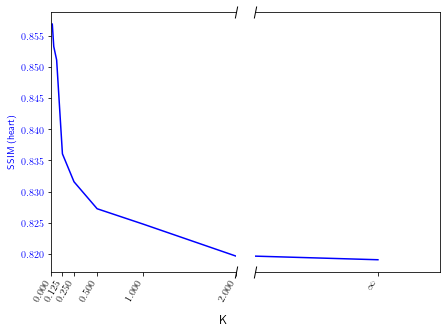

In [127]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import os

plt.rcParams['text.usetex'] = True

path_list = {"K=0.015625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.015625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.03125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.03125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.0625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.0625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.25": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.25\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.5": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.5\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=1.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_1\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=2.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_2\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=\infty": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_infini\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv"
             }

fig, ax = plt.subplots(1, 2, sharey=True)

ssim_list = []
epe_list = []
for key in path_list.keys():
    df_epe = pd.read_csv(path_list[key])
    mean_epe = df_epe['Average'].values.mean()
    epe_list.append(mean_epe)

    dirname = os.sep.join(path_list[key].split(os.sep)[:-3])

    ssim_path = os.path.join(dirname, 'Raw', 'Backward_flow', 'ssim_metrics_all.csv')
    df_ssim = pd.read_csv(ssim_path)
    mean_ssim = df_ssim['SSIM_mean'].values.mean()
    ssim_list.append(mean_ssim)

t = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]

ax[0].set_ylabel('SSIM (heart)', c='b')
ax[0].plot(t, ssim_list[:-1], c='b')
ax[0].tick_params(axis='y', labelcolor='b')
ax[0].set_xticks([0.0, 0.125, 0.25, 0.5, 1.0, 2.0])

plt.setp(ax[0].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[1].plot([2.0, 4.0], ssim_list[-2:], c='b')
ax[1].set_xticks([4.0])
ax[1].set_xticklabels(["$\infty$"])
plt.setp(ax[1].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[0].set_xlim(0, 2.0)  # outliers only
ax[1].set_xlim(2.0, 5.0)  # most of the data

# hide the spines between ax and ax2
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_tick_params(left=False, labelleft=False)

plt.subplots_adjust(left=0.1, right=1.0, wspace=0.1, hspace=0.0, top=1.0, bottom=0.1)

d = 5.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([1, 1], [0, 1], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [0, 1], transform=ax[1].transAxes, **kwargs)

fig.text(0.5, -0.07, 'K', ha='center', va='center', fontsize=12.0)

plt.savefig('SSIM_k.png', dpi=600)

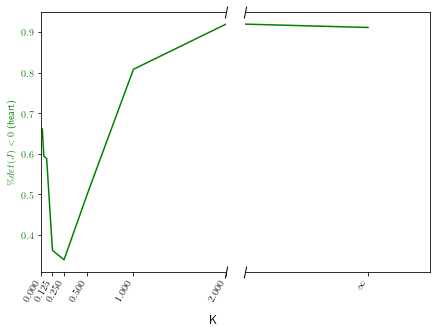

In [125]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import os

plt.rcParams['text.usetex'] = True

path_list = {"K=0.015625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.015625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.03125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.03125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.0625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.0625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.25": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.25\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.5": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.5\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=1.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_1\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=2.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_2\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=∞": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_infini\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv"
             }

fig, ax = plt.subplots(1, 2, sharey=True)

epe_list = []
jacobian_list = []
for key in path_list.keys():
    df_epe = pd.read_csv(path_list[key])
    mean_epe = df_epe['Average'].values.mean()
    epe_list.append(mean_epe)

    dirname = os.sep.join(path_list[key].split(os.sep)[:-3])

    jacobian_path = os.path.join(dirname, 'Raw', 'Backward_flow', 'jacobian_metrics.csv')
    df_jacobian = pd.read_csv(jacobian_path)
    mean_jacobian = df_jacobian['negative_%_average'].values.mean()
    jacobian_list.append(mean_jacobian)

t = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]

#ax.set_xlabel('K')
ax[0].set_ylabel('$\% det(J) < 0$ (heart)', c='g')
ax[0].plot(t, jacobian_list[:-1], c='g')
ax[0].tick_params(axis='y', labelcolor='g')
ax[0].set_xticks([0.0, 0.125, 0.25, 0.5, 1.0, 2.0])

plt.setp(ax[0].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[1].plot([2.0, 4.0], jacobian_list[-2:], c='g')
ax[1].set_xticks([4.0])
ax[1].set_xticklabels(["$\infty$"])

plt.setp(ax[1].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[0].set_xlim(0, 2.0)  # outliers only
ax[1].set_xlim(2.0, 5.0)  # most of the data

# hide the spines between ax and ax2
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_tick_params(left=False, labelleft=False)

plt.subplots_adjust(left=0.1, right=1.0, wspace=0.1, hspace=0.0, top=1.0, bottom=0.1)

d = 5.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([1, 1], [0, 1], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [0, 1], transform=ax[1].transAxes, **kwargs)

fig.text(0.5, -0.07, 'K', ha='center', va='center', fontsize=12.0)

plt.savefig('regu_k.png', dpi=600)

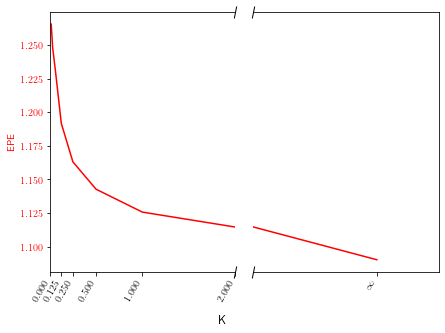

In [126]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd
import os
import matplotlib

plt.rcParams['text.usetex'] = True

path_list = {"K=0.015625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.015625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.03125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.03125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.0625": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.0625\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.125": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.125\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.25": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.25\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=0.5": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_0.5\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=1.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_1\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=2.0": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_2\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv",
             "k=∞": r"C:\Users\Portal\Documents\voxelmorph\exposant\new\exposant_infini\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow\strain_metrics_0.csv"
             }

fig, ax = plt.subplots(1, 2, sharey=True)

epe_list = []
for key in path_list.keys():
    df_epe = pd.read_csv(path_list[key])
    mean_epe = df_epe['Average'].values.mean()
    epe_list.append(mean_epe)

#t = np.arange(len(epe_list))
t = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
ax[0].set_ylabel('EPE', c='r')
#ax[0].set_xlabel('K')
ax[0].plot(t, epe_list[:-1], c='r')
ax[0].tick_params(axis='y', labelcolor='r')
#ax.set_xscale('log')
ax[0].set_xticks([0.0, 0.125, 0.25, 0.5, 1.0, 2.0])
#ax.set_xticklabels(t)
#ax.set_xticklabels([0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, "$\infty$"])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.setp(ax[0].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[1].plot([2.0, 4.0], epe_list[-2:], c='r')
#ax[1].tick_params(axis='y', labelcolor='r')
#ax.set_xscale('log')
ax[1].set_xticks([4.0])
ax[1].set_xticklabels(["$\infty$"])
#ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#ax.set_xticklabels([0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, "$\infty$"])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.setp(ax[1].get_xticklabels(), rotation=60, horizontalalignment='right')

ax[0].set_xlim(0, 2.0)  # outliers only
ax[1].set_xlim(2.0, 5.0)  # most of the data

# hide the spines between ax and ax2
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_tick_params(left=False, labelleft=False)

plt.subplots_adjust(left=0.1, right=1.0, wspace=0.1, hspace=0.0, top=1.0, bottom=0.1)

d = 5.0  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([1, 1], [0, 1], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [0, 1], transform=ax[1].transAxes, **kwargs)

fig.text(0.5, -0.07, 'K', ha='center', va='center', fontsize=12.0)

#fig.tight_layout()

plt.savefig('epe_k.png', dpi=600)

Get registered image

In [2]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Raw\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient116'
depth = 1

motion_estimation = SpatialTransformer(size=(192, 192))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

ed_img = cv.normalize(ed_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
ed_img = clahe.apply(ed_img)

es_img = cv.normalize(es_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
es_img = clahe.apply(es_img)

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

fig, ax = plt.subplots(2, 6, figsize=(6, 2))
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    if key == 'IterWarpImg':
        flow_path_list = np.insert(flow_path_list, ed_idx, np.nan)
        frame_indices = np.arange(len(flow_path_list))
        after = frame_indices >= ed_idx
        before = frame_indices < ed_idx
        frame_indices_permutation = np.concatenate([frame_indices[after], frame_indices[before]])
        new_es_idx = np.where(frame_indices_permutation == es_idx)[0][0]
        flow_path_list = flow_path_list[frame_indices_permutation]
        flow_path_list = flow_path_list[1:new_es_idx + 1]

        registered = es_img[None, None]
        for current_path in flow_path_list:
            data = np.load(current_path)
            flow = data['flow'][:, :, depth]
            flow = flow.transpose((2, 0, 1))
            flow = torch.from_numpy(flow).float()
            registered = motion_estimation(flow=flow[None], original=registered, mode='bilinear')
    else:

        flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

        data = np.load(flow_path)
        flow = data['flow'][:, :, depth]
        flow = flow.transpose((2, 0, 1))

        flow = torch.from_numpy(flow).float()

        registered = motion_estimation(flow=flow[None], original=es_img[None, None], mode='bilinear')

    ax[idx//6, idx%6].imshow(registered[0, 0], cmap='gray')
    ax[idx//6, idx%6].axis('off')
    ax[idx//6, idx%6].text(0.5,-0.15, key, size=6, ha="center", 
         transform=ax[idx//6, idx%6].transAxes)

ax[1, 3].imshow(ed_img, cmap='gray')
ax[1, 3].text(0.5,-0.15, 'ED', size=6, ha="center", 
         transform=ax[1, 3].transAxes)
ax[1, 3].axis('off')

ax[1, 4].imshow(es_img, cmap='gray')
ax[1, 4].text(0.5,-0.15, 'ES', size=6, ha="center", 
         transform=ax[1, 4].transAxes)
ax[1, 4].axis('off')

ax[1, 5].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(5):
    box = ax[1, j].get_position()
    box.x0 = box.x0 + 0.085
    box.x1 = box.x1 + 0.085
    ax[1, j].set_position(box)

#plt.tight_layout()



plt.savefig('registration_benchmark.png', dpi=600)

In [4]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Raw\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient116'
depth = 1

motion_estimation = SpatialTransformer(size=(192, 192))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

ed_img = cv.normalize(ed_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
ed_img = clahe.apply(ed_img)

es_img = cv.normalize(es_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
es_img = clahe.apply(es_img)

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

fig, ax = plt.subplots(2, 6, figsize=(6, 2))
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    if key == 'IterWarpImg':
        flow_path_list = np.insert(flow_path_list, ed_idx, np.nan)
        frame_indices = np.arange(len(flow_path_list))
        after = frame_indices >= ed_idx
        before = frame_indices < ed_idx
        frame_indices_permutation = np.concatenate([frame_indices[after], frame_indices[before]])
        new_es_idx = np.where(frame_indices_permutation == es_idx)[0][0]
        flow_path_list = flow_path_list[frame_indices_permutation]
        flow_path_list = flow_path_list[1:new_es_idx + 1]

        registered = es_img[None, None]
        for current_path in flow_path_list:
            data = np.load(current_path)
            flow = data['flow'][:, :, depth]
            flow = flow.transpose((2, 0, 1))
            flow = torch.from_numpy(flow).float()
            registered = motion_estimation(flow=flow[None], original=registered, mode='bilinear')
    else:

        flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

        data = np.load(flow_path)
        flow = data['flow'][:, :, depth]
        flow = flow.transpose((2, 0, 1))

        flow = torch.from_numpy(flow).float()

        registered = motion_estimation(flow=flow[None], original=es_img[None, None], mode='bilinear')

    ax[idx//6, idx%6].imshow(np.abs(registered[0, 0]-ed_img), cmap='hot')
    ax[idx//6, idx%6].axis('off')
    ax[idx//6, idx%6].text(0.5,-0.15, key, size=6, ha="center", 
         transform=ax[idx//6, idx%6].transAxes)

ax[1, 3].imshow(ed_img, cmap='gray')
ax[1, 3].text(0.5,-0.15, 'ED', size=6, ha="center", 
         transform=ax[1, 3].transAxes)
ax[1, 3].axis('off')

ax[1, 4].imshow(es_img, cmap='gray')
ax[1, 4].text(0.5,-0.15, 'ES', size=6, ha="center", 
         transform=ax[1, 4].transAxes)
ax[1, 4].axis('off')

ax[1, 5].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(5):
    box = ax[1, j].get_position()
    box.x0 = box.x0 + 0.085
    box.x1 = box.x1 + 0.085
    ax[1, j].set_position(box)

#plt.tight_layout()



plt.savefig('registration_benchmark.png', dpi=600)

In [43]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow",
            #"Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow",
            #"RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Raw\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient103'
depth = 1

motion_estimation = SpatialTransformer(size=(192, 192))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

#ed_img = cv.normalize(ed_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
#clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#ed_img = clahe.apply(ed_img)
#
#es_img = cv.normalize(es_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
#es_img = clahe.apply(es_img)

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

fig, ax = plt.subplots(2, 5, figsize=(6, 2))
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    if key == 'IterWarpImg':
        flow_path_list = np.insert(flow_path_list, ed_idx, np.nan)
        frame_indices = np.arange(len(flow_path_list))
        after = frame_indices >= ed_idx
        before = frame_indices < ed_idx
        frame_indices_permutation = np.concatenate([frame_indices[after], frame_indices[before]])
        new_es_idx = np.where(frame_indices_permutation == es_idx)[0][0]
        flow_path_list = flow_path_list[frame_indices_permutation]
        flow_path_list = flow_path_list[1:new_es_idx + 1]

        registered = es_img[None, None]
        for current_path in flow_path_list:
            data = np.load(current_path)
            flow = data['flow'][:, :, depth]
            flow = flow.transpose((2, 0, 1))
            flow = torch.from_numpy(flow).float()
            registered = motion_estimation(flow=flow[None], original=registered, mode='bilinear')
    else:

        flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

        data = np.load(flow_path)
        flow = data['flow'][:, :, depth]
        flow = flow.transpose((2, 0, 1))

        flow = torch.from_numpy(flow).float()

        registered = motion_estimation(flow=flow[None], original=es_img[None, None], mode='bilinear')

    ax[idx//4, idx%4].imshow(registered[0, 0], cmap='gray')
    ax[idx//4, idx%4].axis('off')
    ax[idx//4, idx%4].text(0.5,-0.15, key, size=6, ha="center", 
         transform=ax[idx//4, idx%4].transAxes)

ax[1, 3].imshow(ed_img, cmap='gray')
ax[1, 3].text(0.5,-0.15, 'Fixed', size=6, ha="center", 
         transform=ax[1, 3].transAxes)
ax[1, 3].axis('off')

ax[1, 4].imshow(es_img, cmap='gray')
ax[1, 4].text(0.5,-0.15, 'Moving', size=6, ha="center", 
         transform=ax[1, 4].transAxes)
ax[1, 4].axis('off')

ax[0, 4].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(4):
    box = ax[0, j].get_position()
    box.x0 = box.x0 + 0.1
    box.x1 = box.x1 + 0.1
    ax[0, j].set_position(box)

#plt.tight_layout()



plt.savefig('registration_benchmark_icpr.png', dpi=600)

Get image with flow

In [1]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow",
            #"IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Raw\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient116'
depth = 1

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

ed_img = cv.normalize(ed_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
ed_img = clahe.apply(ed_img)

es_img = cv.normalize(es_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
es_img = clahe.apply(es_img)

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()


fig, ax = plt.subplots(2, 6, figsize=(6, 2))
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

    data = np.load(flow_path)
    flow = data['flow'][:, :, depth]
    flow = flow.transpose((2, 0, 1))

    flow = torch.from_numpy(flow).float()

    step_quiver = 4
    X, Y = np.meshgrid(np.arange(0, flow.shape[1], step=step_quiver), np.arange(flow.shape[2], step=step_quiver))
    ax[idx//6, idx%6].imshow(ed_img, cmap='gray')
    ax[idx//6, idx%6].quiver(X, Y, flow[1, ::step_quiver, ::step_quiver], flow[0, ::step_quiver, ::step_quiver], color='r', angles='xy', scale_units='xy', scale=1)
    ax[idx//6, idx%6].axis('off')
    ax[idx//6, idx%6].text(0.5,-0.15, key, size=6, ha="center", 
         transform=ax[idx//6, idx%6].transAxes)

ax[1, 2].imshow(ed_img, cmap='gray')
ax[1, 2].text(0.5,-0.15, 'ED', size=6, ha="center", 
         transform=ax[1, 2].transAxes)
ax[1, 2].axis('off')

ax[1, 3].imshow(es_img, cmap='gray')
ax[1, 3].text(0.5,-0.15, 'ES', size=6, ha="center", 
         transform=ax[1, 3].transAxes)
ax[1, 3].axis('off')

ax[1, 4].remove()
ax[1, 5].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(4):
    box = ax[1, j].get_position()
    box.x0 = box.x0 + 0.17
    box.x1 = box.x1 + 0.17
    ax[1, j].set_position(box)

plt.savefig('flow_benchmark.png', dpi=600)

In [11]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Raw\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Raw\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Raw\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Raw\Backward_flow",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Raw\Backward_flow",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            #"IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\iterative_sum\Lib\test\Raw\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\exposant\no_distance_map\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient116'
depth = 1

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

ed_img = cv.normalize(ed_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
ed_img = clahe.apply(ed_img)

es_img = cv.normalize(es_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
es_img = clahe.apply(es_img)

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()


fig, ax = plt.subplots(2, 6, figsize=(6, 2))
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

    data = np.load(flow_path)
    flow = data['flow'][:, :, depth]
    flow = flow.transpose((2, 0, 1))

    flow = torch.from_numpy(flow).float()

    step_quiver = 4
    X, Y = np.meshgrid(np.arange(0, flow.shape[1], step=step_quiver), np.arange(flow.shape[2], step=step_quiver))
    ax[idx//6, idx%6].imshow(ed_img, cmap='gray')
    ax[idx//6, idx%6].quiver(X, Y, flow[1, ::step_quiver, ::step_quiver], flow[0, ::step_quiver, ::step_quiver], color='r', angles='xy', scale_units='xy', scale=1)
    ax[idx//6, idx%6].axis('off')
    ax[idx//6, idx%6].text(0.5,-0.15, key, size=6, ha="center", 
         transform=ax[idx//6, idx%6].transAxes)

ax[1, 2].imshow(ed_img, cmap='gray')
ax[1, 2].text(0.5,-0.15, 'ED', size=6, ha="center", 
         transform=ax[1, 2].transAxes)
ax[1, 2].axis('off')

ax[1, 3].imshow(es_img, cmap='gray')
ax[1, 3].text(0.5,-0.15, 'ES', size=6, ha="center", 
         transform=ax[1, 3].transAxes)
ax[1, 3].axis('off')

ax[1, 4].remove()
ax[1, 5].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(4):
    box = ax[1, j].get_position()
    box.x0 = box.x0 + 0.17
    box.x1 = box.x1 + 0.17
    ax[1, j].set_position(box)

plt.savefig('flow_benchmark_cmig.png', dpi=600)

In [3]:
%matplotlib qt

import os
from glob import glob
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from nnunet.network_architecture.integration import SpatialTransformerContour
import nibabel as nib
import scipy
import cv2 as cv

plt.rcParams['text.usetex'] = True

def handle_one_slice_iterative(key, ax, img, flow, gt_ed_contours, gt_es_contours, gt_ed_contours_rv, gt_es_contours_rv):

    gt_ed_contours = torch.from_numpy(gt_ed_contours.copy()).float()
    gt_es_contours = torch.from_numpy(gt_es_contours.copy()).float()
    gt_ed_contours_rv = torch.from_numpy(gt_ed_contours_rv.copy()).float()
    gt_es_contours_rv = torch.from_numpy(gt_es_contours_rv.copy()).float()

    first_contours = torch.clone(gt_ed_contours) # 2, P, 2
    first_contours_rv = torch.clone(gt_ed_contours_rv)[None] # 1, P, 2
    first_contours = first_contours.permute(0, 2, 1) # 2, 2, P
    first_contours_rv = first_contours_rv.permute(0, 2, 1) # 2, 2, P
    first_contours = first_contours[:, :, None, :] # 2, 2, 1, P
    first_contours_rv = first_contours_rv[:, :, None, :] # 2, 2, 1, P

    #fig, ax = plt.subplots(1, 1)
    #ax.imshow(current_slice_img[0].numpy(), cmap='gray')
    #ax.scatter(first_contours[0, 0, 0], first_contours[0, 1, 0])
    #ax.scatter(first_contours[1, 0, 0], first_contours[1, 1, 0])
    #ax.scatter(first_contours_rv[0, 0, 0], first_contours_rv[0, 1, 0])
    #plt.show()
    #plt.close(fig)

    #fig = plt.figure()
    #fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

    current_frame_flow = torch.clone(flow) # T, 2, H, W; index 0 is all 0
    current_frame_img = torch.clone(img).numpy() # H, W

    #current_frame_flow = current_frame_flow.transpose((1, 2, 0)) # H, W, 2
    #x = np.rint(current_contours[:, 0]).astype(int)
    #y = np.rint(current_contours[:, 1]).astype(int)

    #x_range = np.arange(0, current_frame_flow.shape[1])
    #y_range = np.arange(0, current_frame_flow.shape[0])
    #xv, yv = np.meshgrid(x_range, y_range)
    #grid_x = current_frame_flow[:, :, 0] + xv
    #grid_y = current_frame_flow[:, :, 1] + yv
    #grid_x = grid_x[y, x]
    #grid_y = grid_y[y, x]
    #grid_x_alt = current_frame_flow[:, :, 1] + xv
    #grid_y_alt = current_frame_flow[:, :, 0] + yv
    #grid_x_alt = grid_x_alt[y, x]
    #grid_y_alt = grid_y_alt[y, x]

    #fig, ax = plt.subplots(1, 2)
    #ax[0].imshow(img[d, -1, :, :], cmap='gray')
    #ax[1].imshow(img[d, -1, :, :], cmap='gray')
    #ax[0].scatter(grid_x, grid_y, c='r')
    #ax[0].scatter(next_contours[:, 0], next_contours[:, 1], c='g')
    #ax[1].scatter(grid_x_alt, grid_y_alt, c='b')
    #ax[1].scatter(next_contours[:, 0], next_contours[:, 1], c='g')
    #plt.show()

    #current_frame_flow = torch.flip(current_frame_flow, dims=[0])

    current_contour = torch.clone(first_contours)
    current_contour_rv = torch.clone(first_contours_rv)

    for t in range(len(flow)):

        delta_pred = spatial_transformer(torch.clone(current_contour), current_frame_flow[t][None].repeat(2, 1, 1, 1))
        delta_pred_rv = spatial_transformer(torch.clone(current_contour_rv), current_frame_flow[t][None].repeat(1, 1, 1, 1))
        current_contour = (current_contour + delta_pred) # structure, C, 1, P
        current_contour_rv = (current_contour_rv + delta_pred_rv) # structure, C, 1, P
    
    new_predicted_points = current_contour.squeeze(2) # structure, C, P
    new_predicted_points_rv = current_contour_rv.squeeze(2) # 1, C, P

    delta_pred = new_predicted_points - gt_ed_contours.permute(0, 2, 1)
    delta_pred_rv = new_predicted_points_rv - gt_ed_contours_rv.permute(1, 0)[None]

    gt_point_endo = gt_es_contours[0]
    gt_flow_endo = gt_es_contours[0] - gt_ed_contours[0]

    gt_point_epi = gt_es_contours[1]
    gt_flow_epi = gt_es_contours[1] - gt_ed_contours[1]

    gt_point_rv = gt_es_contours_rv # P, 2
    gt_flow_rv = gt_es_contours_rv - gt_ed_contours_rv

    step_quiver = 1
    
    X, Y = torch.meshgrid(torch.arange(start=0, end=current_frame_img.shape[0], step=step_quiver), torch.arange(start=0, end=current_frame_img.shape[1], step=step_quiver))
    X = spatial_transformer(torch.clone(first_contours), X[None, None].repeat(2, 1, 1, 1).float())
    Y = spatial_transformer(torch.clone(first_contours), Y[None, None].repeat(2, 1, 1, 1).float())

    current_frame_img = cv.normalize(current_frame_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    current_frame_img = clahe.apply(current_frame_img)

    # PRED endo/epi
    ax.imshow(current_frame_img, cmap='gray')
    ax.scatter(new_predicted_points[0, 0], new_predicted_points[0, 1], c='r', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), delta_pred[0, 0, :].reshape(-1,), delta_pred[0, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)
    ax.scatter(new_predicted_points[1, 0], new_predicted_points[1, 1], c='r', s=0.4)
    ax.quiver(Y[1, 0, 0, :].reshape(-1,), X[1, 0, 0, :].reshape(-1,), delta_pred[1, 0, :].reshape(-1,), delta_pred[1, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)

    #GT endo/epi
    ax.scatter(gt_point_endo[:, 0], gt_point_endo[:, 1], c='g', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), gt_flow_endo[:, 0].reshape(-1,), gt_flow_endo[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)
    ax.scatter(gt_point_epi[:, 0], gt_point_epi[:, 1], c='g', s=0.4)
    ax.quiver(Y[1, 0, 0, :].reshape(-1,), X[1, 0, 0, :].reshape(-1,), gt_flow_epi[:, 0].reshape(-1,), gt_flow_epi[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)
    
    # PRED RV
    X, Y = torch.meshgrid(torch.arange(start=0, end=current_frame_img.shape[0], step=step_quiver), torch.arange(start=0, end=current_frame_img.shape[1], step=step_quiver))
    X = spatial_transformer(torch.clone(first_contours_rv), X[None, None].repeat(1, 1, 1, 1).float())
    Y = spatial_transformer(torch.clone(first_contours_rv), Y[None, None].repeat(1, 1, 1, 1).float())
    ax.scatter(new_predicted_points_rv[0, 0], new_predicted_points_rv[0, 1], c='r', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), delta_pred_rv[0, 0, :].reshape(-1,), delta_pred_rv[0, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)
    
    #GT RV
    ax.scatter(gt_point_rv[:, 0], gt_point_rv[:, 1], c='g', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), gt_flow_rv[:, 0].reshape(-1,), gt_flow_rv[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)
    my_max_x = torch.max(new_predicted_points, dim=-1)[0][1, 0] + 10
    my_max_y = max(torch.max(new_predicted_points, dim=-1)[0][1, 1], torch.max(new_predicted_points_rv, dim=-1)[0][0, 1]) + 10
    my_min_y = min(torch.min(new_predicted_points, dim=-1)[0][1, 1], torch.min(new_predicted_points_rv, dim=-1)[0][0, 1]) - 10

    my_min_x = torch.min(new_predicted_points_rv, dim=-1)[0][0, 0] - 10

    ax.axis('off')
    ax.axis([my_min_x, my_max_x, my_min_y, my_max_y])

    ax.text(0.5,-0.15, key, size=6, ha="center", transform=ax.transAxes)
    
    #im16 = plt.tight_layout()
    #plt.show()
    #plt.close(fig)

    #ani = animation.ArtistAnimation(fig=fig, artists=frames, interval=200, repeat_delay=1000)
    #ani.save(patient_name + "_slice" + str(slice_nb) + '.mp4', writer='ffmpeg')
    #plt.close(fig)



def handle_one_slice(key, ax, img, flow, gt_ed_contours, gt_es_contours, gt_ed_contours_rv, gt_es_contours_rv):

    gt_ed_contours = torch.from_numpy(gt_ed_contours.copy()).float()
    gt_es_contours = torch.from_numpy(gt_es_contours.copy()).float()
    gt_ed_contours_rv = torch.from_numpy(gt_ed_contours_rv.copy()).float()
    gt_es_contours_rv = torch.from_numpy(gt_es_contours_rv.copy()).float()

    first_contours = torch.clone(gt_ed_contours) # 2, P, 2
    first_contours_rv = torch.clone(gt_ed_contours_rv)[None] # 1, P, 2
    first_contours = first_contours.permute(0, 2, 1) # 2, 2, P
    first_contours_rv = first_contours_rv.permute(0, 2, 1) # 2, 2, P
    out_list = [torch.clone(first_contours)]
    out_list_rv = [torch.clone(first_contours_rv)]
    first_contours = first_contours[:, :, None, :] # 2, 2, 1, P
    first_contours_rv = first_contours_rv[:, :, None, :] # 2, 2, 1, P

    #fig, ax = plt.subplots(1, 1)
    #ax.imshow(current_slice_img[0].numpy(), cmap='gray')
    #ax.scatter(first_contours[0, 0, 0], first_contours[0, 1, 0])
    #ax.scatter(first_contours[1, 0, 0], first_contours[1, 1, 0])
    #ax.scatter(first_contours_rv[0, 0, 0], first_contours_rv[0, 1, 0])
    #plt.show()
    #plt.close(fig)

    #fig = plt.figure()
    #fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

    current_frame_flow = torch.clone(flow) # 2, H, W; index 0 is all 0
    current_frame_img = torch.clone(img).numpy() # H, W

    #current_frame_flow = current_frame_flow.transpose((1, 2, 0)) # H, W, 2
    #x = np.rint(current_contours[:, 0]).astype(int)
    #y = np.rint(current_contours[:, 1]).astype(int)

    #x_range = np.arange(0, current_frame_flow.shape[1])
    #y_range = np.arange(0, current_frame_flow.shape[0])
    #xv, yv = np.meshgrid(x_range, y_range)
    #grid_x = current_frame_flow[:, :, 0] + xv
    #grid_y = current_frame_flow[:, :, 1] + yv
    #grid_x = grid_x[y, x]
    #grid_y = grid_y[y, x]
    #grid_x_alt = current_frame_flow[:, :, 1] + xv
    #grid_y_alt = current_frame_flow[:, :, 0] + yv
    #grid_x_alt = grid_x_alt[y, x]
    #grid_y_alt = grid_y_alt[y, x]

    #fig, ax = plt.subplots(1, 2)
    #ax[0].imshow(img[d, -1, :, :], cmap='gray')
    #ax[1].imshow(img[d, -1, :, :], cmap='gray')
    #ax[0].scatter(grid_x, grid_y, c='r')
    #ax[0].scatter(next_contours[:, 0], next_contours[:, 1], c='g')
    #ax[1].scatter(grid_x_alt, grid_y_alt, c='b')
    #ax[1].scatter(next_contours[:, 0], next_contours[:, 1], c='g')
    #plt.show()

    #current_frame_flow = torch.flip(current_frame_flow, dims=[0])

    delta_pred = spatial_transformer(torch.clone(first_contours), current_frame_flow[None].repeat(2, 1, 1, 1))
    delta_pred_rv = spatial_transformer(torch.clone(first_contours_rv), current_frame_flow[None].repeat(1, 1, 1, 1))
    new_predicted_points = (first_contours + delta_pred).squeeze(2) # structure, C, P
    new_predicted_points_rv = (first_contours_rv + delta_pred_rv).squeeze(2) # structure, C, P
    out_list.append(new_predicted_points)
    out_list_rv.append(new_predicted_points_rv)

    gt_point_endo = gt_es_contours[0]
    gt_flow_endo = gt_es_contours[0] - gt_ed_contours[0]

    gt_point_epi = gt_es_contours[1]
    gt_flow_epi = gt_es_contours[1] - gt_ed_contours[1]

    gt_point_rv = gt_es_contours_rv # P, 2
    gt_flow_rv = gt_es_contours_rv - gt_ed_contours_rv

    step_quiver = 1
    
    X, Y = torch.meshgrid(torch.arange(start=0, end=current_frame_img.shape[0], step=step_quiver), torch.arange(start=0, end=current_frame_img.shape[1], step=step_quiver))
    X = spatial_transformer(torch.clone(first_contours), X[None, None].repeat(2, 1, 1, 1).float())
    Y = spatial_transformer(torch.clone(first_contours), Y[None, None].repeat(2, 1, 1, 1).float())

    current_frame_img = cv.normalize(current_frame_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    current_frame_img = clahe.apply(current_frame_img)

    # PRED endo/epi
    ax.imshow(current_frame_img, cmap='gray')
    ax.scatter(new_predicted_points[0, 0], new_predicted_points[0, 1], c='r', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), delta_pred[0, 0, :].reshape(-1,), delta_pred[0, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)
    ax.scatter(new_predicted_points[1, 0], new_predicted_points[1, 1], c='r', s=0.4)
    ax.quiver(Y[1, 0, 0, :].reshape(-1,), X[1, 0, 0, :].reshape(-1,), delta_pred[1, 0, :].reshape(-1,), delta_pred[1, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)

    #GT endo/epi
    ax.scatter(gt_point_endo[:, 0], gt_point_endo[:, 1], c='g', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), gt_flow_endo[:, 0].reshape(-1,), gt_flow_endo[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)
    ax.scatter(gt_point_epi[:, 0], gt_point_epi[:, 1], c='g', s=0.4)
    ax.quiver(Y[1, 0, 0, :].reshape(-1,), X[1, 0, 0, :].reshape(-1,), gt_flow_epi[:, 0].reshape(-1,), gt_flow_epi[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)
    
    # PRED RV
    X, Y = torch.meshgrid(torch.arange(start=0, end=current_frame_img.shape[0], step=step_quiver), torch.arange(start=0, end=current_frame_img.shape[1], step=step_quiver))
    X = spatial_transformer(torch.clone(first_contours_rv), X[None, None].repeat(1, 1, 1, 1).float())
    Y = spatial_transformer(torch.clone(first_contours_rv), Y[None, None].repeat(1, 1, 1, 1).float())
    ax.scatter(new_predicted_points_rv[0, 0], new_predicted_points_rv[0, 1], c='r', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), delta_pred_rv[0, 0, :].reshape(-1,), delta_pred_rv[0, 1, :].reshape(-1,), color='r', angles='xy', scale_units='xy', scale=1)
    
    #GT RV
    ax.scatter(gt_point_rv[:, 0], gt_point_rv[:, 1], c='g', s=0.4)
    ax.quiver(Y[0, 0, 0, :].reshape(-1,), X[0, 0, 0, :].reshape(-1,), gt_flow_rv[:, 0].reshape(-1,), gt_flow_rv[:, 1].reshape(-1,), color='g', angles='xy', scale_units='xy', scale=1)

    my_max_x = torch.max(new_predicted_points, dim=-1)[0][1, 0] + 10
    my_max_y = max(torch.max(new_predicted_points, dim=-1)[0][1, 1], torch.max(new_predicted_points_rv, dim=-1)[0][0, 1]) + 10
    my_min_y = min(torch.min(new_predicted_points, dim=-1)[0][1, 1], torch.min(new_predicted_points_rv, dim=-1)[0][0, 1]) - 10
    my_min_x = torch.min(new_predicted_points_rv, dim=-1)[0][0, 0] - 10

    ax.axis('off')
    ax.axis([my_min_x, my_max_x, my_min_y, my_max_y])

    ax.text(0.5,-0.15, key, size=6, ha="center", transform=ax.transAxes)
    
    #im16 = plt.tight_layout()
    #plt.show()
    #plt.close(fig)

    #ani = animation.ArtistAnimation(fig=fig, artists=frames, interval=200, repeat_delay=1000)
    #ani.save(patient_name + "_slice" + str(slice_nb) + '.mp4', writer='ffmpeg')
    #plt.close(fig)

#path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Backward_flow",
#            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Backward_flow",
#            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Backward_flow",
#            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Backward_flow",
#            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Backward_flow",
#            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow",
#            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow",
#            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\iterative_warp\2024-07-02_11H29_59s_847044\iterative_sum\Lib\test\Postprocessed\Backward_flow",
#            "Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow"}

path_list = {"VM-MSE":r"C:\Users\Portal\Documents\voxelmorph\results\VM-SSD-2\Lib\test\Postprocessed\Backward_flow",
            "VM-DIF":r"C:\Users\Portal\Documents\voxelmorph\results\VM-DIF-2\Lib\test\Postprocessed\Backward_flow",
            "VM-NCC":r"C:\Users\Portal\Documents\voxelmorph\results\VM-NCC-2\Lib\test\Postprocessed\Backward_flow",
            "SyN":r"C:\Users\Portal\Documents\voxelmorph\syn\Lib\test\Postprocessed\Backward_flow",
            "Bioinformed":r"C:\Users\Portal\Documents\biomechanical_loss\models\2024-07-09_17H24\Lib\test\Postprocessed\Backward_flow",
            "RAFT":r"C:\Users\Portal\Documents\voxelmorph\RAFT\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow",
            "IterWarpImg":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow",
            "IterWarpFlow":r"C:\Users\Portal\Documents\voxelmorph\exposant\iter_warp\iterative_sum\Lib\test\Postprocessed\Backward_flow",
            "Ours": r"C:\Users\Portal\Documents\voxelmorph\exposant\no_distance_map\Task032_Lib\fold_0\Lib\test\Postprocessed\Backward_flow"}

patient_name = 'patient116'
depth = 1

with open(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\custom_lib_t_4\failed_patients.cfg", 'r') as fd:
        lines = fd.read().splitlines()
        lines = [os.path.basename(x).split('_short_axis')[0] for x in lines]
        print(lines)

pkl_path = os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\custom_lib_t_4", patient_name, 'info_01.pkl')
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)
    mat_filename = data['FileName']
    mat_path = glob(os.path.join(r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\data_lib_mat", '**', mat_filename), recursive=True)[0]
    print(mat_path)
    mat = scipy.io.loadmat(mat_path, simplify_cells=True)
    my_list = mat['data']['orientations']['short_axis']['slices']

    list_ori = list(mat['data']['orientations'].keys())
    kOri = list_ori.index('short_axis') + 1

    kS_list = []
    segI_list = []
    for i in range(len(my_list)):
        if isinstance(my_list[i]['structures'], dict):
            #print(my_list[i]['structures']['LV']['contour']['X1'].shape)
            kS_list.append(i + 1)

slice_nb = str(depth + 1).zfill(2)
mat_name = os.path.basename(mat_path)[:-4] + '_Slice_' + slice_nb
assert mat_name not in lines

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)
    print(ed_idx)
    print(es_idx)

ed_img_path = os.path.join('custom_lib_t_4', patient_name, patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.nii.gz')
es_img_path = os.path.join('custom_lib_t_4', patient_name, patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.nii.gz')

ed_img = nib.load(ed_img_path)
ed_img = ed_img.get_fdata()[:, :, depth]

es_img = nib.load(es_img_path)
es_img = es_img.get_fdata()[:, :, depth]

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

filename = patient_name + '_slice' + slice_nb + '.npy'

gt_folder_name = r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\out\nnUNet_preprocessed\Task036_Lib"
gt_path_lv = os.path.join(gt_folder_name, 'contour', 'LV', filename)
gt_path_rv = os.path.join(gt_folder_name, 'contour', 'RV', filename)
gt_lv_contour = np.load(gt_path_lv).transpose((2, 1, 0)) # T, P1, 4
gt_rv_contour = np.load(gt_path_rv).transpose((2, 1, 0)) # T, P2, 2

gt_endo_contour = gt_lv_contour[:, :, :2]
gt_epi_contour = gt_lv_contour[:, :, 2:]
contours = np.stack([gt_endo_contour, gt_epi_contour], axis=0) # 2, T, P, 2

contours = contours - 1
gt_rv_contour = gt_rv_contour - 1

gt_ed_contours = contours[:, ed_idx]
gt_es_contours = contours[:, es_idx]

gt_ed_contours_rv = gt_rv_contour[ed_idx]
gt_es_contours_rv = gt_rv_contour[es_idx]

fig, ax = plt.subplots(2, 6, figsize=(6, 2))

spatial_transformer = SpatialTransformerContour(size=ed_img.shape[-2:])
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))
    if key == 'IterWarpImg':
        flow_path_list_new = np.array(flow_path_list)
        frame_indices = np.arange(len(flow_path_list))
        after = frame_indices >= ed_idx
        before = frame_indices < ed_idx
        flow_path_list_new = np.concatenate([flow_path_list_new[after], flow_path_list_new[before]])

        es_idx_new = np.where([int(os.path.basename(flow_path_list_new[i]).split('frame')[-1][:2]) == es_idx + 1 for i in range(len(flow_path_list_new))])[0][0]
        flow_path_list_new = flow_path_list_new[:es_idx_new+1]

        flow_list = []
        for i in range(len(flow_path_list_new)):
            data = np.load(flow_path_list_new[i])
            flow = data['flow'][:, :, depth]
            flow = flow.transpose((2, 1, 0))
            flow = torch.from_numpy(flow).float()
            flow_list.append(flow)
        flow = torch.stack(flow_list, dim=0)

        handle_one_slice_iterative(key=key, ax=ax[idx//6, idx%6], img=es_img, flow=flow, gt_ed_contours=gt_ed_contours, gt_es_contours=gt_es_contours, gt_ed_contours_rv=gt_ed_contours_rv, gt_es_contours_rv=gt_es_contours_rv)

    else:
        flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

        data = np.load(flow_path)
        flow = data['flow'][:, :, depth]
        flow = flow.transpose((2, 1, 0))

        flow = torch.from_numpy(flow).float()

        handle_one_slice(key=key, ax=ax[idx//6, idx%6], img=es_img, flow=flow, gt_ed_contours=gt_ed_contours, gt_es_contours=gt_es_contours, gt_ed_contours_rv=gt_ed_contours_rv, gt_es_contours_rv=gt_es_contours_rv)

    #ax[idx//6, idx%6].imshow(ed_img, cmap='gray')
    #ax[idx//6, idx%6].quiver(X, Y, flow[1, ::step_quiver, ::step_quiver], flow[0, ::step_quiver, ::step_quiver], color='r', angles='xy', scale_units='xy', scale=1)
    #ax[idx//6, idx%6].axis('off')
    #ax[idx//6, idx%6].text(0.5,-0.15, key, size=6, ha="center", 
    #     transform=ax[idx//6, idx%6].transAxes)

#ax[1, 2].imshow(ed_img, cmap='gray')
#ax[1, 2].text(0.5,-0.15, 'Fixed', size=6, ha="center", 
#         transform=ax[1, 2].transAxes)
#ax[1, 2].axis('off')
#
#ax[1, 3].imshow(es_img, cmap='gray')
#ax[1, 3].text(0.5,-0.15, 'Moving', size=6, ha="center", 
#         transform=ax[1, 3].transAxes)
#ax[1, 3].axis('off')

#ax[1, 2].remove()
ax[1, 3].remove()
ax[1, 4].remove()
ax[1, 5].remove()

plt.subplots_adjust(left=0.0, right=1.0, wspace=0.0, hspace=0.25, top=1.0, bottom=0.1)
for j in range(3):
    box = ax[1, j].get_position()
    box.x0 = box.x0 + 0.25
    box.x1 = box.x1 + 0.25
    ax[1, j].set_position(box)

plt.savefig('point_benchmark_cmig.png', dpi=600)

['RACINE_AA04019_20130703_Slice_06', 'RACINE_BD04016_20130522_Slice_06', 'RACINE_BD04016_20130522_Slice_13', 'RACINE_BP04001_20121218_Slice_08', 'RACINE_BP04002_20121219_Slice_07', 'RACINE_BP04007_20130208_Slice_06', 'RACINE_BP04007_20130208_Slice_13', 'RACINE_BV04034_20140307_Slice_07', 'RACINE_BV04034_20140307_Slice_14', 'RACINE_CC04010_20130312_Slice_12', 'RACINE_CC04010_20130312_Slice_13', 'RACINE_DA04032_20140225_Slice_10', 'RACINE_DA04032_20140225_Slice_11', 'RACINE_DB04025_20131009_Slice_12', 'RACINE_DB04025_20131009_Slice_13', 'RACINE_DG04017_20130529_Slice_07', 'RACINE_DJ04033_20140228_Slice_13', 'RACINE_DJ04061_20140801_Slice_05', 'RACINE_DJ04061_20140801_Slice_10', 'RACINE_FC04039_20140404_Slice_09', 'RACINE_FC04039_20140404_Slice_10', 'RACINE_GS04029_20140211_Slice_07', 'RACINE_GS04029_20140211_Slice_11', 'RACINE_HL04051_20140616_Slice_05', 'RACINE_HM04005_20130129_Slice_06', 'RACINE_HM04005_20130129_Slice_11', 'RACINE_KG04047_20140507_Slice_04', 'RACINE_KJ04026_20131022_Sl

In [ ]:
spatial = []
patient_name = []

patient_list = glob(os.path.join(r'ACDC_testing', '*'))
for patient_path in patient_list:
    patient = os.path.basename(patient_path)
    path = os.path.join(patient_path, patient + '_4d.nii.gz')
    data = nib.load(path)
    arr = data.get_fdata()
    spatial.append(np.prod(arr.shape[:2]))
    patient_name.append(patient)
    print(patient)
    print(arr.shape)

spatial = np.array(spatial)
patient_name = np.array(patient_name)

indices = np.argsort(spatial)
spatial = spatial[indices]
patient_name = patient_name[indices]
print(spatial[0])
print(patient_name[0])
print(spatial[-1])
print(patient_name[-1])

In [ ]:
spatial = []
patient_name = []

patient_list = glob(os.path.join(r'custom_quorum_RV_removed', '*'))
patient_list = [x for x in patient_list if '.cfg' not in x]
for patient_path in patient_list:
    patient = os.path.basename(patient_path)
    path = os.path.join(patient_path, patient + '_ed.nii.gz')
    data = nib.load(path)
    arr = data.get_fdata()
    spatial.append(np.prod(arr.shape[:2]))
    patient_name.append(patient)
    print(patient)
    print(arr.shape)

spatial = np.array(spatial)
patient_name = np.array(patient_name)

indices = np.argsort(spatial)
spatial = spatial[indices]
patient_name = patient_name[indices]
print(spatial[0])
print(patient_name[0])
print(spatial[-1])
print(patient_name[-1])

Volume vidéo

In [50]:
from glob import glob
import os
import matplotlib.animation as animation
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, frameon=False)

frames = []

data_gt = nib.load(r'custom_quorum_RV_removed\patient093\patient093_ed_gt.nii.gz')
data_img = nib.load(r'custom_quorum_RV_removed\patient093\patient093_ed.nii.gz')

arr_gt = data_gt.get_fdata()
arr_img = data_img.get_fdata()

for i in range(2, arr_gt.shape[-1]):
    segmentation_map = arr_gt[:, :, i]
    c1 = ax.imshow(arr_img[:, :, i], cmap='gray')
    alpha_map_r = np.where(segmentation_map == 1, 0.5, 0.0).astype(float)[:, :, None]
    alpha_map_g = np.where(segmentation_map == 2, 0.5, 0.0).astype(float)[:, :, None]
    alpha_map_b = np.where(segmentation_map == 3, 0.5, 0.0).astype(float)[:, :, None]
    r = np.pad((segmentation_map == 1)[:, :, None], ((0, 0), (0, 0), (0, 2)))
    g = np.pad((segmentation_map == 2)[:, :, None], ((0, 0), (0, 0), (1, 1)))
    b = np.pad((segmentation_map == 3)[:, :, None], ((0, 0), (0, 0), (2, 0)))
    r = np.concatenate([r, alpha_map_r], axis=-1)
    g = np.concatenate([g, alpha_map_g], axis=-1)
    b = np.concatenate([b, alpha_map_b], axis=-1)
    c2 = ax.imshow(r)
    c3 = ax.imshow(g)
    c4 = ax.imshow(b)
    ax.axis('off')
    frames.append([c1, c2, c3, c4])

fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ani = animation.ArtistAnimation(fig=fig, artists=frames, interval=400, repeat_delay=1000)
ani.save('volume_example.mp4', writer='ffmpeg')
plt.close(fig)

deformation vidéo

In [67]:
from glob import glob
import os
import matplotlib.animation as animation
import nibabel as nib
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy

path_list = glob(os.path.join(r'custom_lib_t_4\patient001', '*.gz'))
path_list_gt = [x for x in path_list if '_gt' in x]
path_list_img = [x for x in path_list if '_gt' not in x]

fig, ax = plt.subplots(1, 1)
color = [0, 0, 0]
depth = 1
frames = []

for i in range(len(path_list_gt)):
    data_gt = nib.load(path_list_gt[i])
    data_img = nib.load(path_list_img[i])

    arr_gt = data_gt.get_fdata()[:, :, depth]
    arr_img = data_img.get_fdata()[:, :, depth]

    arr_img = cv.normalize(arr_img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
    arr_img = cv.cvtColor(arr_img, cv.COLOR_GRAY2RGB)

    for j in range(1, 4):
        pred = (arr_gt == j).astype(np.uint8)
        pred_contours, hierarchy = cv.findContours(pred, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        current_color = copy(color)
        current_color[j-1] = 255
        arr_img = cv.drawContours(arr_img, pred_contours, -1, current_color, 1)
    
    c1 = ax.imshow(arr_img)
    ax.axis('off')
    frames.append([c1])

fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ani = animation.ArtistAnimation(fig=fig, artists=frames, interval=200, repeat_delay=1000)
ani.save('contour_example.mp4', writer='ffmpeg')
plt.close(fig)

In [2]:
%matplotlib qt
#fig, ax = plt.subplots(1, 1, frameon=False)

from mayavi import mlab
import nibabel as nib

data_gt = nib.load(r'custom_quorum_RV_removed\patient093\patient093_ed_gt.nii.gz')
data_img = nib.load(r'custom_quorum_RV_removed\patient093\patient093_ed.nii.gz')

arr_gt = data_gt.get_fdata()
arr_img = data_img.get_fdata()

# Determine the spacing for each dimension
# Assuming spacing is available from the header, otherwise, replace these with the actual values
x_spacing, y_spacing, z_spacing = data_gt.header.get_zooms()  # Get spacing from the image header
spacing = (x_spacing, y_spacing, z_spacing)  # Tuple for spacing

# Create a scalar field for the ground truth data
src = mlab.pipeline.scalar_field(arr_gt)

# Adjust the spacing to prevent the flat appearance
src.spacing = spacing  # Set the correct spacing for each dimension

# Define colors for each contour level
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # Red, Green, Blue

# Create an empty list to keep track of the objects
iso_surfaces = []

for i in range(1, 4):
    # Plot using contour3d with the adjusted spacing
    iso = mlab.pipeline.iso_surface(src, contours=[i], transparent=True)
    iso.actor.property.color = colors[i-1]  # Set the color for this contour level
    iso_surfaces.append(iso)

#obj = mlab.pipeline.iso_surface(src, contours=[arr_gt.min() + 0.1 * (arr_gt.max() - arr_gt.min()), 
#                                              arr_gt.min() + 0.5 * (arr_gt.max() - arr_gt.min()), 
#                                              arr_gt.min() + 0.8 * (arr_gt.max() - arr_gt.min())], 
#                                              transparent=True)

# Show the plot
mlab.show()

: 

Get deformed grid

In [8]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pystrum.pynd.ndutils as nd
from matplotlib import cm
from numpy.lib.stride_tricks import sliding_window_view
from mpl_toolkits.axes_grid1 import make_axes_locatable

def jacobian_determinant(disp):
    """
    jacobian determinant of a displacement field.
    NB: to compute the spatial gradients, we use np.gradient.

    Parameters:
        disp: 2D or 3D displacement field of size [*vol_shape, nb_dims], 
              where vol_shape is of len nb_dims

    Returns:
        jacobian determinant (scalar)
    """

    # check inputs
    volshape = disp.shape[:-1]
    nb_dims = len(volshape)
    assert len(volshape) in (2, 3), 'flow has to be 2D or 3D'

    # compute grid
    grid_lst = nd.volsize2ndgrid(volshape)
    grid = np.stack(grid_lst, len(volshape))

    # compute gradients
    J = np.gradient(disp + grid)

    # 3D glow
    if nb_dims == 3:
        dx = J[0]
        dy = J[1]
        dz = J[2]

        # compute jacobian components
        Jdet0 = dx[..., 0] * (dy[..., 1] * dz[..., 2] - dy[..., 2] * dz[..., 1])
        Jdet1 = dx[..., 1] * (dy[..., 0] * dz[..., 2] - dy[..., 2] * dz[..., 0])
        Jdet2 = dx[..., 2] * (dy[..., 0] * dz[..., 1] - dy[..., 1] * dz[..., 0])

        return Jdet0 - Jdet1 + Jdet2

    else:  # must be 2

        dfdx = J[0]
        dfdy = J[1]

        return dfdx[..., 0] * dfdy[..., 1] - dfdy[..., 0] * dfdx[..., 1]

def plot_grid(x,y, ax, jacobian, vmin=None, vmax=None):

    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)

    if vmin == vmax:
        norm = plt.Normalize(jacobian.min(), jacobian.max())
    else:
        norm = plt.Normalize(vmin, vmax)

    for i in range(len(segs1)):
        current_segs1 = segs1[i]
        current_segs2 = segs2[i]
        current_segs1 = sliding_window_view(current_segs1, window_shape=2, axis=0)
        current_segs2 = sliding_window_view(current_segs2, window_shape=2, axis=0)
        current_segs1 = current_segs1.transpose(0, 2, 1)
        current_segs2 = current_segs2.transpose(0, 2, 1)
        ax.add_collection(LineCollection(current_segs1, array=jacobian[i], cmap='seismic', norm=norm))
        im = ax.add_collection(LineCollection(current_segs2, array=jacobian[i], cmap='seismic', norm=norm))
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.autoscale(tight=True)
    ax.set_aspect(asp)

def plot_grid_axins(x,y, ax, jacobian, **kwargs):

    #asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)

    norm = plt.Normalize(jacobian.min(), jacobian.max())

    for i in range(len(segs1)):
        current_segs1 = segs1[i]
        current_segs2 = segs2[i]
        current_segs1 = sliding_window_view(current_segs1, window_shape=2, axis=0)
        current_segs2 = sliding_window_view(current_segs2, window_shape=2, axis=0)
        current_segs1 = current_segs1.transpose(0, 2, 1)
        current_segs2 = current_segs2.transpose(0, 2, 1)
        ax.add_collection(LineCollection(current_segs1, array=jacobian[i], cmap='hot', norm=norm))
        ax.add_collection(LineCollection(current_segs2, array=jacobian[i], cmap='hot', norm=norm))
    #ax.autoscale(tight=True)
    #ax.set_aspect(asp)

path_list = {"Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient270'
depth = 1

step_quiver = 1
motion_estimation = SpatialTransformer(size=(192//step_quiver, 192//step_quiver))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

fig, ax = plt.subplots(1, 2)
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

    data = np.load(flow_path)
    flow = data['flow'][:, :, depth]
    jacobian = jacobian_determinant(flow)
    indices = jacobian < 0
    flow_j = flow.reshape((-1, 2))
    indices_j = indices.reshape((-1,))
    flow_j = flow_j[indices_j, :]

    new_indices = np.argwhere(indices) + flow_j # (Y, X) + (Y, X)

    flow_sub = flow[::step_quiver, ::step_quiver]

    #for j in range(len(new_indices)):
    #    #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
    #    circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
    #    ax.add_patch(circle1)
    
    X, Y = np.meshgrid(np.arange(0, 192, step=step_quiver), np.arange(192, step=step_quiver))
    
    #plot_grid(X, Y, ax=ax,  color="lightgrey")
    ax[0].set_facecolor('black')
    plot_grid(X + flow_sub[:, :, 1], Y + flow_sub[:, :, 0], ax=ax[0],  jacobian=jacobian[::step_quiver, ::step_quiver])
    ax[0].invert_yaxis()
    ax[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    X, Y = np.meshgrid(np.arange(0, 192, step=1), np.arange(192, step=1))
    x1, x2, y1, y2 = 60, 80, 90, 130
    ax[1].set_facecolor('black')
    plot_grid(X + flow[:, :, 1], Y + flow[:, :, 0], ax=ax[1], jacobian=jacobian, vmin=-0.5, vmax=0.5)
    ax[1].set_xlim(x1, x2)
    ax[1].set_ylim(y1, y2)
    ax[0].indicate_inset_zoom(ax[1], edgecolor="r", linewidth=3.0, alpha=1.0)
    ax[1].invert_yaxis()
    ax[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    plt.subplots_adjust(left=0.0, right=1.0, wspace=0.15, hspace=0)
    plt.tight_layout()

plt.savefig('jacobian.png', dpi=600)

    #x1, x2, y1, y2 = 60, 80, 115, 125
    #ax[2].set_facecolor('black')
    #plot_grid(X + flow[:, :, 1], Y + flow[:, :, 0], ax=ax[2],  color="w", new_indices=new_indices)
    #ax[2].set_xlim(x1, x2)
    #ax[2].set_ylim(y1, y2)
    #ax[1].indicate_inset_zoom(ax[2], edgecolor="r")
    #ax[2].invert_yaxis()

    #x1, x2, y1, y2 = 50, 100, 90, 130
    #axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
    #axins.set_facecolor('black')
    #plot_grid_axins(X + flow[:, :, 1], Y + flow[:, :, 0], ax=axins,  new_indices=new_indices, color="w")
    #ax.indicate_inset_zoom(axins, edgecolor="r")
    #axins.invert_yaxis()

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.collections as mcoll
import matplotlib.path as mpath

def colorline(
    x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    print(segments.shape)
    print(z.shape)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc


def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

N = 10
np.random.seed(101)
x = np.random.rand(N)
y = np.random.rand(N)
fig, ax = plt.subplots()

path = mpath.Path(np.column_stack([x, y]))
verts = path.interpolated(steps=3).vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(x))
colorline(x, y, z, cmap=plt.get_cmap('jet'), linewidth=2)

plt.show()

(27, 2, 2)
(28,)


In [6]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pystrum.pynd.ndutils as nd
from matplotlib import cm

def jacobian_determinant(disp):
    """
    jacobian determinant of a displacement field.
    NB: to compute the spatial gradients, we use np.gradient.

    Parameters:
        disp: 2D or 3D displacement field of size [*vol_shape, nb_dims], 
              where vol_shape is of len nb_dims

    Returns:
        jacobian determinant (scalar)
    """

    # check inputs
    volshape = disp.shape[:-1]
    nb_dims = len(volshape)
    assert len(volshape) in (2, 3), 'flow has to be 2D or 3D'

    # compute grid
    grid_lst = nd.volsize2ndgrid(volshape)
    grid = np.stack(grid_lst, len(volshape))

    # compute gradients
    J = np.gradient(disp + grid)

    # 3D glow
    if nb_dims == 3:
        dx = J[0]
        dy = J[1]
        dz = J[2]

        # compute jacobian components
        Jdet0 = dx[..., 0] * (dy[..., 1] * dz[..., 2] - dy[..., 2] * dz[..., 1])
        Jdet1 = dx[..., 1] * (dy[..., 0] * dz[..., 2] - dy[..., 2] * dz[..., 0])
        Jdet2 = dx[..., 2] * (dy[..., 0] * dz[..., 1] - dy[..., 1] * dz[..., 0])

        return Jdet0 - Jdet1 + Jdet2

    else:  # must be 2

        dfdx = J[0]
        dfdy = J[1]

        return dfdx[..., 0] * dfdy[..., 1] - dfdy[..., 0] * dfdx[..., 1]

def plot_grid(x,y, ax, new_indices, **kwargs):
    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
        ax.add_patch(circle1)

    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale(tight=True)
    ax.set_aspect(asp)

def plot_grid_axins(x,y, ax, new_indices, **kwargs):
    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
        ax.add_patch(circle1)

    #asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    #ax.autoscale(tight=True)
    #ax.set_aspect(asp)

path_list = {"Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient270'
depth = 1

step_quiver = 1
motion_estimation = SpatialTransformer(size=(192//step_quiver, 192//step_quiver))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

#fig, ax = plt.subplots(1, 2, projection='3d')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]

    data = np.load(flow_path)
    flow = data['flow'][:, :, depth]
    jacobian = jacobian_determinant(flow)
    indices = jacobian < 0
    flow_j = flow.reshape((-1, 2))
    indices_j = indices.reshape((-1,))
    flow_j = flow_j[indices_j, :]

    new_indices = np.argwhere(indices) + flow_j # (Y, X) + (Y, X)

    flow_sub = flow[::step_quiver, ::step_quiver]

    #for j in range(len(new_indices)):
    #    #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
    #    circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
    #    ax.add_patch(circle1)
    
    X, Y = np.meshgrid(np.arange(0, 192, step=step_quiver), np.arange(192, step=step_quiver))

    deformed_X = X + flow_sub[:, :, 1]
    deformed_Y = Y + flow_sub[:, :, 0]

    norm = plt.Normalize(jacobian.min(), jacobian.max())
    colors = cm.hot(norm(jacobian))
    rcount, ccount, _ = colors.shape

    surf = ax.plot_surface(deformed_X, deformed_Y, jacobian, rcount=50, ccount=50,
                       facecolors=colors, shade=False)
    
    surf.set_facecolor((0,0,0,0))
    
    ##plot_grid(X, Y, ax=ax,  color="lightgrey")
    #ax[0].set_facecolor('black')
    #plot_grid(, , ax=ax[0],  color="w", new_indices=new_indices)
    #ax[0].invert_yaxis()
    #ax[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#
    #X, Y = np.meshgrid(np.arange(0, 192, step=1), np.arange(192, step=1))
    #x1, x2, y1, y2 = 60, 80, 90, 130
    #ax[1].set_facecolor('black')
    #plot_grid(X + flow[:, :, 1], Y + flow[:, :, 0], ax=ax[1],  color="w", new_indices=new_indices)
    #ax[1].set_xlim(x1, x2)
    #ax[1].set_ylim(y1, y2)
    #ax[0].indicate_inset_zoom(ax[1], edgecolor="r", linewidth=3.0)
    #ax[1].invert_yaxis()
    #ax[1].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#
    #plt.subplots_adjust(left=0.0, right=1.0, wspace=0, hspace=0)
    #plt.tight_layout()

#plt.savefig('jacobian.png', dpi=600)

In [208]:
%matplotlib qt

import os
from glob import glob
import pickle
from nnunet.network_architecture.integration import SpatialTransformer
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pystrum.pynd.ndutils as nd

def jacobian_determinant(disp):
    """
    jacobian determinant of a displacement field.
    NB: to compute the spatial gradients, we use np.gradient.

    Parameters:
        disp: 2D or 3D displacement field of size [*vol_shape, nb_dims], 
              where vol_shape is of len nb_dims

    Returns:
        jacobian determinant (scalar)
    """

    # check inputs
    volshape = disp.shape[:-1]
    nb_dims = len(volshape)
    assert len(volshape) in (2, 3), 'flow has to be 2D or 3D'

    # compute grid
    grid_lst = nd.volsize2ndgrid(volshape)
    grid = np.stack(grid_lst, len(volshape))

    # compute gradients
    J = np.gradient(disp + grid)

    # 3D glow
    if nb_dims == 3:
        dx = J[0]
        dy = J[1]
        dz = J[2]

        # compute jacobian components
        Jdet0 = dx[..., 0] * (dy[..., 1] * dz[..., 2] - dy[..., 2] * dz[..., 1])
        Jdet1 = dx[..., 1] * (dy[..., 0] * dz[..., 2] - dy[..., 2] * dz[..., 0])
        Jdet2 = dx[..., 2] * (dy[..., 0] * dz[..., 1] - dy[..., 1] * dz[..., 0])

        return Jdet0 - Jdet1 + Jdet2

    else:  # must be 2

        dfdx = J[0]
        dfdy = J[1]

        return dfdx[..., 0] * dfdy[..., 1] - dfdy[..., 0] * dfdx[..., 1]

def plot_grid(x,y, ax, new_indices, **kwargs):
    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
        ax.add_patch(circle1)

    asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale(tight=True)
    ax.set_aspect(asp)

def plot_grid_axins(x,y, ax, new_indices, **kwargs):
    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='r', fill=False)
        ax.add_patch(circle1)

    #asp = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    #ax.autoscale(tight=True)
    #ax.set_aspect(asp)

path_list = {"Ours": r"C:\Users\Portal\Documents\voxelmorph\icpr_models\2024-07-09_17H24_52s_461126\Task032_Lib\fold_0\Lib\test\Raw\Backward_flow"}

patient_name = 'patient270'
depth = 1

step_quiver = 1
motion_estimation = SpatialTransformer(size=(192//step_quiver, 192//step_quiver))

with open(os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl'), 'rb') as f:
    data = pickle.load(f)
    ed_idx = np.rint(data['ed_number']).astype(int)
    es_idx = np.rint(data['es_number']).astype(int)

ed_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(ed_idx + 1).zfill(2) + '.npy')
es_img_path = os.path.join('Lib_resampling_testing_mask', patient_name + '_frame' + str(es_idx + 1).zfill(2) + '.npy')

ed_img = np.load(ed_img_path)[0, :, :, depth]
es_img = np.load(es_img_path)[0, :, :, depth]

es_img = torch.from_numpy(es_img).float()
ed_img = torch.from_numpy(ed_img).float()

fig, ax = plt.subplots(1, 2)
    
registered_list = []
for idx, key in enumerate(path_list.keys()):

    flow_path_list = np.array(sorted(glob(os.path.join(path_list[key], patient_name, '*.npz'))))

    flow_path = [x for x in flow_path_list if str(es_idx + 1).zfill(2) in os.path.basename(x).split('_')[-1]][0]
    
    data = np.load(flow_path)
    flow = data['flow'][:, :, depth]
    jacobian = jacobian_determinant(flow)
    indices = jacobian < 0
    flow_j = flow.reshape((-1, 2))
    indices_j = indices.reshape((-1,))
    flow_j = flow_j[indices_j, :]

    new_indices = np.argwhere(indices) + flow_j # (Y, X) + (Y, X)

    flow = flow[::step_quiver, ::step_quiver]

    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='g', fill=False)
        ax[0].add_patch(circle1)
    
    X, Y = np.meshgrid(np.arange(0, 192, step=step_quiver), np.arange(192, step=step_quiver))
    ax[0].imshow(ed_img, cmap='gray')
    ax[0].quiver(X, Y, flow[::step_quiver, ::step_quiver, 1], flow[::step_quiver, ::step_quiver, 0], color='r', angles='xy', scale_units='xy', scale=1)
    ax[0].axis('off')

    for j in range(len(new_indices)):
        #if new_indices[j][1] % step_quiver == 0 and new_indices[j][0] % step_quiver == 0:
        circle1 = plt.Circle((new_indices[j][1], new_indices[j][0]), 3.0, color='g', fill=False)
        ax[1].add_patch(circle1)

    x1, x2, y1, y2 = 60, 80, 90, 130
    ax[1].imshow(ed_img, cmap='gray')
    ax[1].quiver(X, Y, flow[::step_quiver, ::step_quiver, 1], flow[::step_quiver, ::step_quiver, 0], color='r', angles='xy', scale_units='xy', scale=1)
    ax[1].axis('off')
    ax[1].set_xlim(x1, x2)
    ax[1].set_ylim(y1, y2)
    ax[0].indicate_inset_zoom(ax[1], edgecolor="r", linewidth=5.0)
    ax[1].invert_yaxis()
    
    plt.subplots_adjust(left=0.0, right=1.0, wspace=0, hspace=0)
    plt.tight_layout()

In [34]:
%matplotlib qt
import matplotlib.pyplot as plt

import scipy

mat_ai = scipy.io.loadmat(r'C:\Users\Portal\Documents\voxelmorph\exposant\Supervised\Task032_Lib\fold_0\Lib\test\Postprocessed\Strain\AI\patient007_slice_01_ai.mat', simplify_cells=True)
data_ai = mat_ai['Structure_ai']
circ_curve_ai = data_ai['Scirc_LV_curve'][0]
radial_curve_ai = data_ai['Sradial_LV_curve'][0]
rv_curve_ai = data_ai['Scirc_RV_curve'][0]

mat_gt = scipy.io.loadmat(r'C:\Users\Portal\Documents\voxelmorph\exposant\Supervised\Task032_Lib\fold_0\Lib\test\Postprocessed\Strain\GT\patient007_slice_01_gt.mat', simplify_cells=True)
data_gt = mat_gt['Structure_gt']
circ_curve_gt = data_gt['Scirc_LV_curve'][0]
radial_curve_gt = data_gt['Sradial_LV_curve'][0]
rv_curve_gt = data_gt['Scirc_RV_curve'][0]

fig, ax = plt.subplots(1, 3)
ax[0].plot(radial_curve_ai, c='r')
ax[0].plot(radial_curve_gt, c='g')

ax[1].plot(circ_curve_ai, c='r')
ax[1].plot(circ_curve_gt, c='g')

ax[2].plot(rv_curve_ai, c='r')
ax[2].plot(rv_curve_gt, c='g')

In [7]:
%matplotlib qt

from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2 as cv

path_list = np.array(sorted(glob(os.path.join(r'Lib_resampling_testing_mask', 'patient084*.npy'))))

with open(r'Lib_resampling_testing_mask\patient084_frame01.pkl', 'rb') as f:
    data = pickle.load(f)
    es_number = np.rint(data['es_number']).astype(int)
    ed_number = np.rint(data['ed_number']).astype(int)

path = path_list[ed_number]
data = np.load(path)

img_arr = cv.normalize(data[0, :, :, 0], None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX).astype(np.uint8)
img_arr = cv.cvtColor(img_arr, cv.COLOR_GRAY2RGB)

for j in range(1, 4):
    gt = (data[1, :, :, 0] == j).astype(np.uint8)
    gt_contours, hierarchy = cv.findContours(gt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    gt_color = [0, 255, 0]
    img_arr = cv.drawContours(img_arr, gt_contours, -1, gt_color, 1)

fig, ax = plt.subplots(1, 1)
ax.imshow(img_arr, cmap='gray')

In [1]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Radial': (0.78, 0.79, 0.69, 0.82, 0.83, 0.81),
    'Circumferential': (0.79, 0.67, 0.65, 0.75, 0.74, 0.77),
}

x = np.array([-0.1, 0.9, 1.9, 2.9, 3.9, 4.9])  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1.0

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$r_v$')
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0.6, 0.85)

plt.show()

In [15]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
data = [
    {
    'Toutes les phases': (93.21),
    'Seulement ED et ES': (92.98)},
    {
    'Toutes les phases': (4.12),
    'Seulement ED et ES': (4.27)},
    {
    'Toutes les phases': (0.14),
    'Seulement ED et ES': (0.15)},
]

y_label = ['Score de Dice',
             'HD',
             'ASSD']

y_lim = [(92, 94), (4, 4.5), (0.1, 0.2)]

x = np.array([-0.15])  # the label locations
width = abs(x[0] * 2)  # the width of the bars

fig, ax = plt.subplots(1, 3, layout='constrained')
for i in range(3):

    multiplier = 0

    for attribute, measurement in data[i].items():
        offset = width * multiplier
        rects = ax[i].bar(x + offset, measurement, width, label=attribute)
        ax[i].bar_label(rects, padding=3, size=15)
        multiplier += 1.0

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[i].set_ylabel(y_label[i], fontsize=15)
    #ax.set_title('Penguin attributes by species')
    #ax.set_xticks(x + width, species)
    ax[i].legend()
    ax[i].set_ylim(y_lim[i][0], y_lim[i][1])
    ax[i].set_xticks(x + width / 2)
    ax[i].get_xaxis().set_visible(False)
    ax[i].tick_params(axis='y', labelsize=15)

#fig.suptitle('Mesures de segmentation entrainement sur toutes les phases ou uniquement sur ED/ES', fontsize=12)

plt.savefig('ed_es_vs_all_bar_metrics.png', dpi=600)

In [13]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Toutes les phases': (0.72, 0.84, 0.57),
    'Seulement ED et ES': (0.63, 0.76, 0.12),
}

x_label = ['VG Radial',
             'VG circonférentielle',
             'VD circonférentielle']

x_ticks_list = []

x = np.array([-0.15, 0.85, 1.85])  # the label locations
width = abs(x[0] * 2)  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, size=15)
    multiplier += 1.0

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$\rho$', fontsize=15)
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(prop={'size': 15})
ax.set_ylim(0.1, 1.0)
ax.set_xticks(x + width / 2)
ax.set_xticklabels(x_label)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

#plt.title('Déformation entrainement sur toutes les phases ou uniquement sur ED/ES')

plt.savefig('ed_es_vs_all_bar.png', dpi=600)

In [32]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
measurement = [92.45, 92.42, 92.26, 92.41]
error = [3.15, 3.31, 3.35, 3.22]
attribute = ['SFB-net', 'Sans SFB', 'Transformer remplacé par convolution', 'Sans deep supervision']

x = np.arange(len(measurement))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

rects = ax.bar(x, measurement, width, label=attribute, color=my_cmap(rescale(x)))
ax.bar_label(rects, padding=3, size=15)
#ax.errorbar(x, measurement, error, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score de Dice', fontsize=15)
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(prop={'size': 15})
ax.set_ylim(92, 93)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=15)
#plt.title('Etude ablative', size=15)

plt.savefig('etude_ablative_dice.png', dpi=600)

In [27]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
measurement = [0.55, 0.56, 0.60, 0.58]
error = [0.49, 0.55, 0.51, 0.56]
attribute = ['SFB-net', 'Sans SFB', 'Transformer remplacé par convolution', 'Sans deep supervision']

x = np.arange(len(measurement))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

rects = ax.bar(x, measurement, width, label=attribute, color=my_cmap(rescale(x)))
ax.bar_label(rects, padding=3, size=15)
#ax.errorbar(x, measurement, error, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ASSD (mm)', fontsize=15)
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(loc=2, prop={'size': 15})
ax.set_ylim(0.5, 0.67)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=15)
#plt.title('Etude ablative', size=15)

plt.savefig('etude_ablative_assd.png', dpi=600)

In [33]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
measurement = [9.24, 10.22, 11.49, 10.55]
error = [6.29, 8.13, 10.96, 8.91]
attribute = ['SFB-net', 'Sans SFB', 'Transformer remplacé par convolution', 'Sans deep supervision']

x = np.arange(len(measurement))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

rects = ax.bar(x, measurement, width, label=attribute, color=my_cmap(rescale(x)))
ax.bar_label(rects, padding=3, size=15)
#ax.errorbar(x, measurement, error, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('HD (mm)', fontsize=15)
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(prop={'size': 15})
ax.set_ylim(9, 13)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=15)
#plt.title('Etude ablative', size=15)

plt.savefig('etude_ablative_hd.png', dpi=600)

In [21]:
%matplotlib qt

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True

#species = ("Adelie", "Chinstrap", "Gentoo")
measurement = [1.0, 1.0, 0.98, 0.96, 0.99, 0.99, 0.98, 0.97, 0.90, 0.89]
attribute = ['Volume télédiastolique du VG', 
             'Volume télésystolique du VG', 
             'Fraction d’éjection du VG', 
             'Volume d’éjection du VG', 
             'Masse télédiastolique du MYO', 
             'Masse télésystolique du MYO',
             'Volume télédiastolique du VD', 
             'Volume télésystolique du VD', 
             'Fraction d’éjection du VD', 
             'Volume d’éjection du VD']

x = np.arange(len(measurement))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

rects = ax.bar(x, measurement, width, label=attribute, color=my_cmap(rescale(x)))
ax.bar_label(rects, padding=3, size=15)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'$\rho$', fontsize=15)
#ax.set_title('Penguin attributes by species')
#ax.set_xticks(x + width, species)
ax.legend(ncols=2, prop={'size': 12})
ax.set_ylim(0.85, 1.08)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='y', labelsize=15)
#plt.title('Corrélation sur les paramètres volumétriques sur ACDC')

plt.savefig('volume_correlation.png', dpi=600)

In [114]:
fig, ax = plt.subplots(1, 1)

arr = np.array([[88.99, 92.14], [92.60, 89.66]])

ax.matshow(arr, cmap='hot', alpha=0)

for (i, j), z in np.ndenumerate(arr):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=15)

# Set tick labels
ax.set_xticks(np.arange(arr.shape[1]))  # Set x-ticks to the center of the cells
ax.set_yticks(np.arange(arr.shape[0]))  # Set y-ticks to the center of the cells
ax.set_xticklabels(['ACDC', 'Quorum'])
ax.set_yticklabels(['Quorum', 'ACDC'])

# Move the x-axis label to the top
ax.xaxis.set_label_position('top')
ax.set_xlabel(r'Train', fontsize=15, labelpad=15)
ax.set_ylabel(r'Test', fontsize=15)

# Set grid lines to cross at the borders of cells
ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)

# Apply grid lines
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Hide major ticks
ax.tick_params(which='both', bottom=False, left=False, labelbottom=True, labelleft=True)

plt.title('Score de Dice moyen', fontsize=20, pad=30)

plt.tight_layout()

plt.savefig('generalisation_dice.png', dpi=600)

#ax.set_xticklabels([''] + ['ACDC', 'Quorum'])
#ax.set_yticklabels([''] + ['Quorum', 'ACDC'])
##ax.get_xaxis().set_visible(False)
#ax.set_ylabel(r'Test', fontsize=15)
#ax.xaxis.set_label_position('top')
#ax.set_xlabel(r'Train', fontsize=15)
#ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
#ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)
#ax.grid()
#
#plt.show()

In [68]:
fig, ax = plt.subplots(1, 1)

arr = np.array([[9.79, 7.08], [8.20, 10.37]])

ax.matshow(arr, cmap='hot', alpha=0)

for (i, j), z in np.ndenumerate(arr):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=15)

# Set tick labels
ax.set_xticks(np.arange(arr.shape[1]))  # Set x-ticks to the center of the cells
ax.set_yticks(np.arange(arr.shape[0]))  # Set y-ticks to the center of the cells
ax.set_xticklabels(['ACDC', 'Quorum'])
ax.set_yticklabels(['Quorum', 'ACDC'])

# Move the x-axis label to the top
ax.xaxis.set_label_position('top')
ax.set_xlabel(r'Train', fontsize=15, labelpad=15)
ax.set_ylabel(r'Test', fontsize=15)

# Set grid lines to cross at the borders of cells
ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)

# Apply grid lines
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Hide major ticks
ax.tick_params(which='both', bottom=False, left=False, labelbottom=True, labelleft=True)

plt.title('Distance de Hausdorff moyenne en mm', fontsize=20, pad=30)

plt.tight_layout()

plt.savefig('generalisation_hd.png', dpi=600)

#ax.set_xticklabels([''] + ['ACDC', 'Quorum'])
#ax.set_yticklabels([''] + ['Quorum', 'ACDC'])
##ax.get_xaxis().set_visible(False)
#ax.set_ylabel(r'Test', fontsize=15)
#ax.xaxis.set_label_position('top')
#ax.set_xlabel(r'Train', fontsize=15)
#ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
#ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)
#ax.grid()
#
#plt.show()

In [69]:
fig, ax = plt.subplots(1, 1)

arr = np.array([[0.71, 0.42], [0.43, 0.70]])

ax.matshow(arr, cmap='hot', alpha=0)

for (i, j), z in np.ndenumerate(arr):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=15)

# Set tick labels
ax.set_xticks(np.arange(arr.shape[1]))  # Set x-ticks to the center of the cells
ax.set_yticks(np.arange(arr.shape[0]))  # Set y-ticks to the center of the cells
ax.set_xticklabels(['ACDC', 'Quorum'])
ax.set_yticklabels(['Quorum', 'ACDC'])

# Move the x-axis label to the top
ax.xaxis.set_label_position('top')
ax.set_xlabel(r'Train', fontsize=15, labelpad=15)
ax.set_ylabel(r'Test', fontsize=15)

# Set grid lines to cross at the borders of cells
ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)

# Apply grid lines
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)

# Hide major ticks
ax.tick_params(which='both', bottom=False, left=False, labelbottom=True, labelleft=True)

plt.title('ASSD moyenne en mm', fontsize=20, pad=30)

plt.tight_layout()

plt.savefig('generalisation_assd.png', dpi=600)

#ax.set_xticklabels([''] + ['ACDC', 'Quorum'])
#ax.set_yticklabels([''] + ['Quorum', 'ACDC'])
##ax.get_xaxis().set_visible(False)
#ax.set_ylabel(r'Test', fontsize=15)
#ax.xaxis.set_label_position('top')
#ax.set_xlabel(r'Train', fontsize=15)
#ax.set_xticks(np.arange(arr.shape[1] + 1) - 0.5, minor=True)
#ax.set_yticks(np.arange(arr.shape[0] + 1) - 0.5, minor=True)
#ax.grid()
#
#plt.show()

In [112]:
from scipy import interpolate
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from glob import glob
import pickle
import matplotlib.ticker as mtick

path_list = {"Quorum/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_acdc_2\cv_niftis_raw\summary.json",
            "ACDC/Quorum":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_to_medis_2\fold_0\temp_allClasses\summary.json",
            "Quorum/Quorum":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\medis_to_medis\fold_0\temp_allClasses\summary.json",
            "ACDC/ACDC":r"C:\Users\Portal\Documents\Isensee\nnUNet\nnunet\ACDC_rv_rejection\cv_niftis_raw\summary.json"}
fig, ax = plt.subplots(1, 1)

for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list_1 = data['results']['all']

    mean_dice_list = []
    for data in patient_data_list_1:
        mean_dice = ((data['1']['Dice'] + data['2']['Dice'] + data['3']['Dice']) / 3) * 100
        mean_dice_list.append(mean_dice)
    
    mean_dice = np.array(mean_dice_list)

    y = []
    x = []
    for thresh in np.linspace(85, 100, 1000):
        value = np.count_nonzero(mean_dice < thresh) / len(mean_dice)
        y.append(value * 100)
        x.append(thresh)

    #ax.set_yticks(np.arange(len(y))[::6])
    #ax.set_yticklabels([f'{s:.0%}' for s in y])
    ax.plot(x, y, label=key)

    #if key == 'Ours':
    #    ax.axvline(x=np.median(mean_dice), ls=':', c='k')
        

ax.set_ylabel('Pourcentage des données')
ax.set_xlabel('Dice')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
plt.savefig('cumulative_dice_generalization_french', dpi=600) #dpi=600

In [113]:
%matplotlib qt

import json
import os
import pickle
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

path_list = {"Entrainé avec toutes les phases":r"Quorum_cardioTrack_all_phases\fold_0\temp_allClasses\summary.json",
            "Entrainé uniquement avec les phases ED et ES": r"Quorum_cardioTrack_ED_ES\fold_0\temp_allClasses\summary.json"}

fig, ax = plt.subplots(1, 1)
for key in path_list.keys():
    with open(path_list[key]) as f:
        data = json.load(f)
        patient_data_list = data['results']['all']
        patient_name_list = []
        for case_data in patient_data_list:
            patient_name = os.path.basename(case_data['reference']).split('_')[0]
            patient_name_list.append(patient_name)
        patient_name_list = list(set(patient_name_list))

        all_patient_data_list = []
        for patient_name in patient_name_list:
            one_patient_data = []
            for data in patient_data_list:
                if patient_name in data['reference']:
                    one_patient_data.append(data)
            one_patient_data = sorted(one_patient_data, key=lambda x:int(os.path.basename(x['reference']).split('.')[0][-2:]))
            all_patient_data_list.append(one_patient_data)
        
        m = max([len(x) for x in all_patient_data_list])

        y_new_1_list = []
        for patient_data_list in all_patient_data_list:

            patient_name = os.path.basename(patient_data_list[0]['reference']).split('_')[0]

            pkl_path = os.path.join('custom_lib_t_4', patient_name, 'info_01.pkl')
            with open(pkl_path, 'rb') as f2:
                data_pkl = pickle.load(f2)
                ed_number = np.rint(data_pkl['ed_number']).astype(int)
            
            frame_indices = np.arange(len(patient_data_list))
            before_where = np.argwhere(frame_indices < ed_number).reshape(-1,)
            after_where = np.argwhere(frame_indices >= ed_number).reshape(-1,)
            all_where = np.concatenate([after_where, before_where])

            patient_data_list = np.array(patient_data_list)[all_where]
            assert int(os.path.basename(patient_data_list[0]['reference']).split('.')[0][-2:]) == ed_number + 1, int(os.path.basename(patient_data_list[0]['reference']).split('.')[0][-2:])

            rv_dice = np.array([x['1']['Dice'] for x in patient_data_list])
            myo_dice = np.array([x['2']['Dice'] for x in patient_data_list])
            lv_dice = np.array([x['3']['Dice'] for x in patient_data_list])

            x = np.arange(0, len(patient_data_list))

            y1 = np.stack([rv_dice, myo_dice, lv_dice], axis=0).mean(0)

            f1 = interpolate.interp1d(x, y1)

            x_new = np.linspace(0, len(patient_data_list) - 1, m)
            y_new_1 = np.array(f1(x_new))

            y_new_1_list.append(y_new_1)
        

        y1_arr = np.stack(y_new_1_list, axis=0)
        print(y1_arr.shape)
        y1 = y1_arr.mean(0) * 100

        ax.plot(y1, label=key)

ax.set_ylabel('Score de Dice')
ax.set_xlabel('Phases du cycle cardiaque en commencant par ED')
ax.axvline(x=0, ls=':', c='k')
ax.fill_between(np.linspace(13.79, 23.79, 20), np.full(shape=(20,), fill_value=y1.min()), np.full(shape=(20,), fill_value=y1.max()), alpha=0.2, facecolor='red')
plt.text(-1, 93.0, 'ED', fontsize = 10) 
plt.text(16, 93.5, 'zone ES', fontsize = 10) 
ax.legend()
plt.savefig('Dice_ed_es.png', dpi=600) #dpi=600

(51, 50)
(51, 50)
